In [7]:
import os
import csv

folder_path = "./inputs"  # Replace with the actual folder path

# Get all filenames in the folder
filenames = os.listdir(folder_path)

# Specify the CSV file path
csv_file = "./allinputs.csv"  # Replace with the desired output CSV file path

# Open the CSV file in write mode
with open(csv_file, "w", newline="") as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(["Filename"])

    # Write each filename as a separate row
    for filename in filenames:
        writer.writerow([filename])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18028\3831834759.py:166: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_values_df = ab_values_df.append({'Filename': outputfilename, 'Depth Range': depth_range['name'], 'a-value': a, 'b-value': b}, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18028\3831834759.py:166: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_values_df = ab_values_df.append({'Filename': outputfilename, 'Depth Range': depth_range['name'], 'a-value': a, 'b-value': b}, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18028\3831834759.py:166: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_values_df = ab_values_df.append({'Filename': outputfilename, 'Depth Range': depth_rang

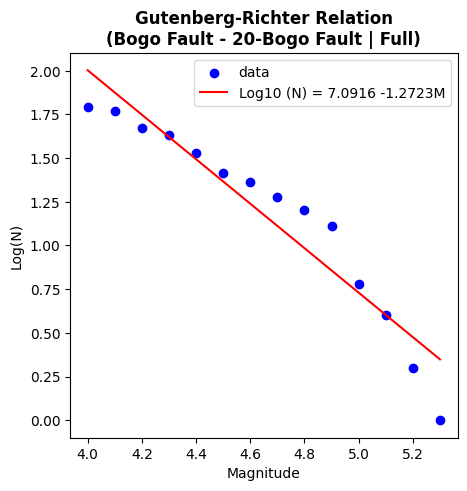

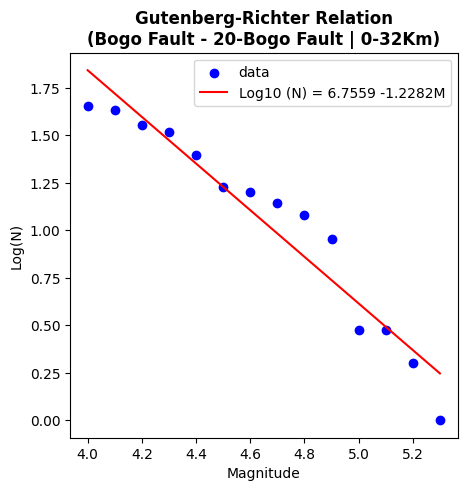

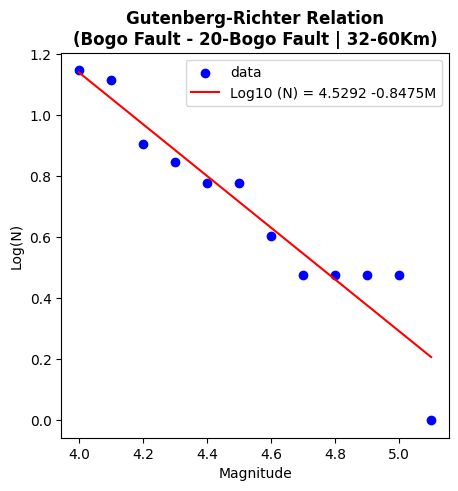

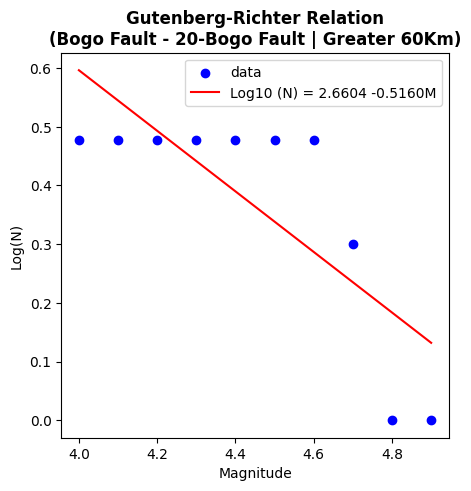

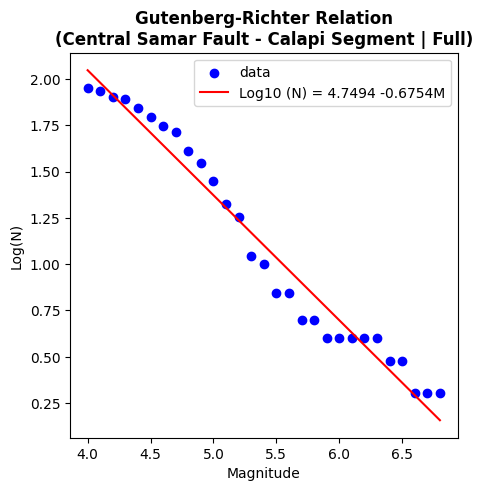

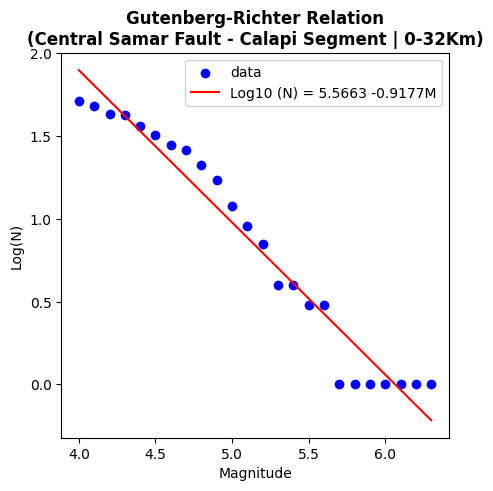

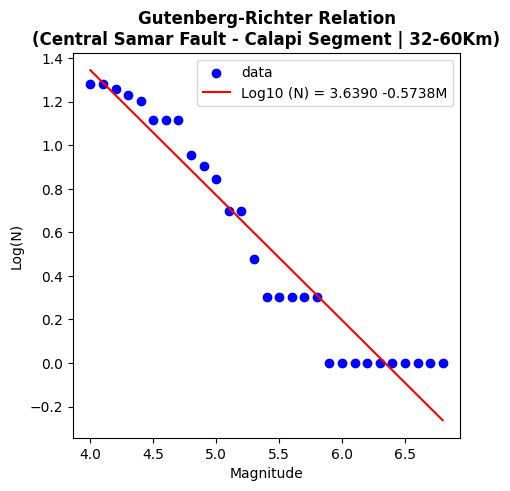

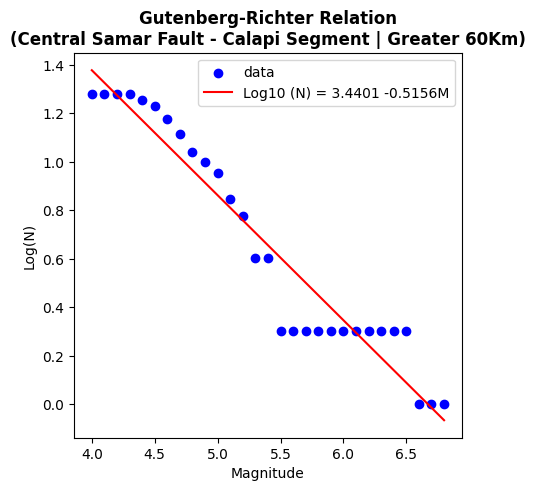

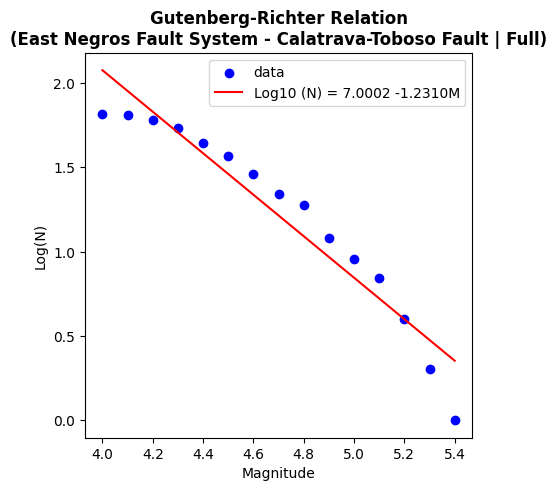

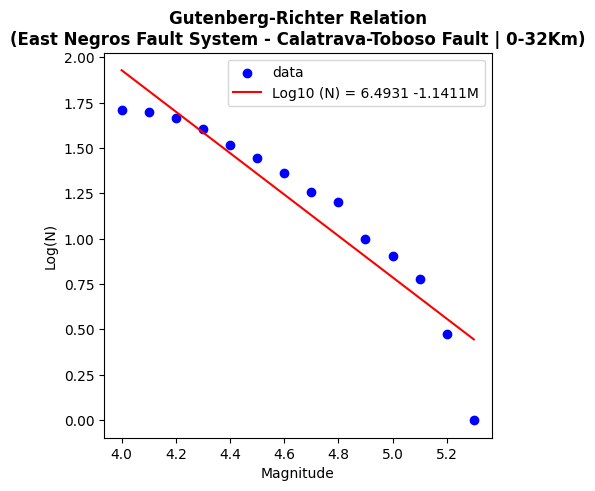

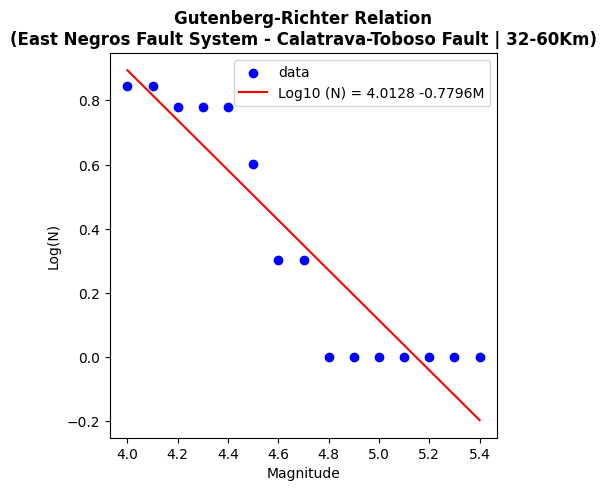

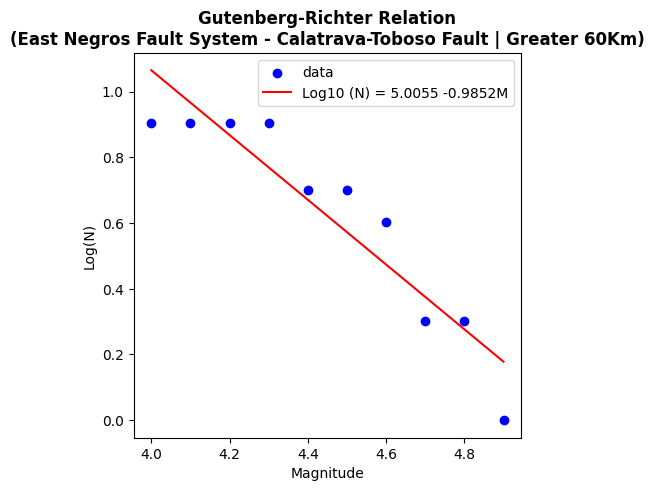

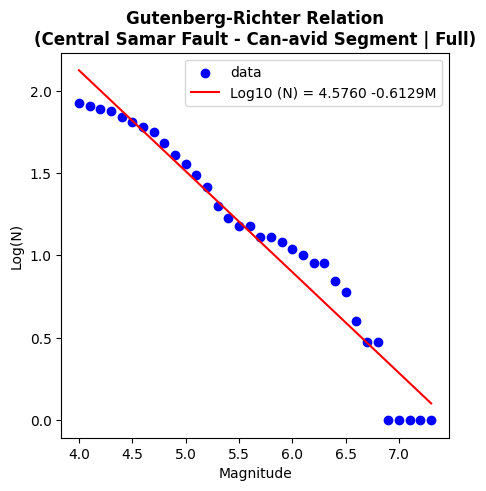

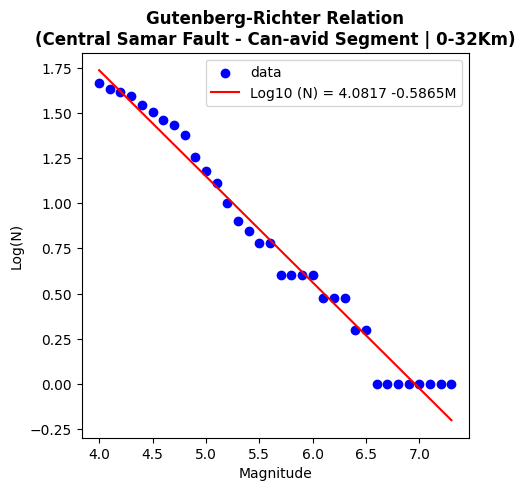

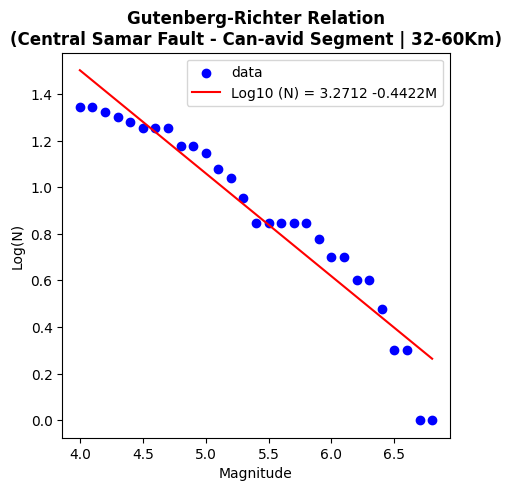

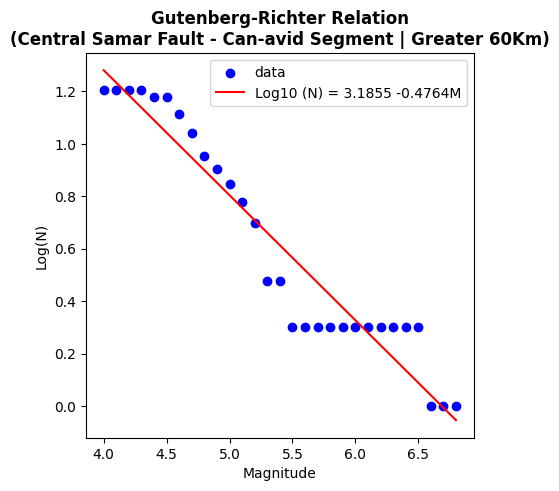

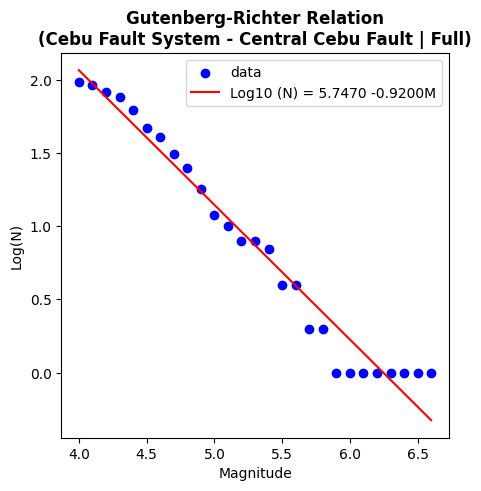

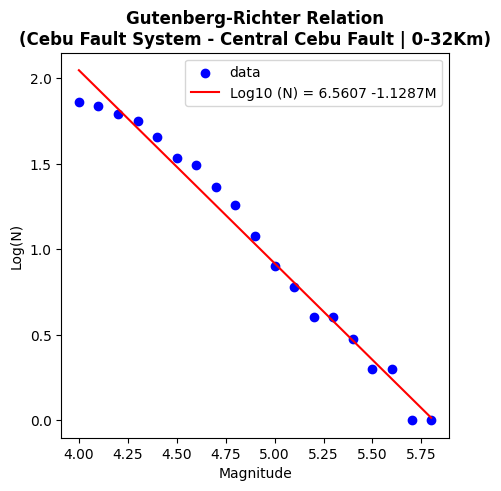

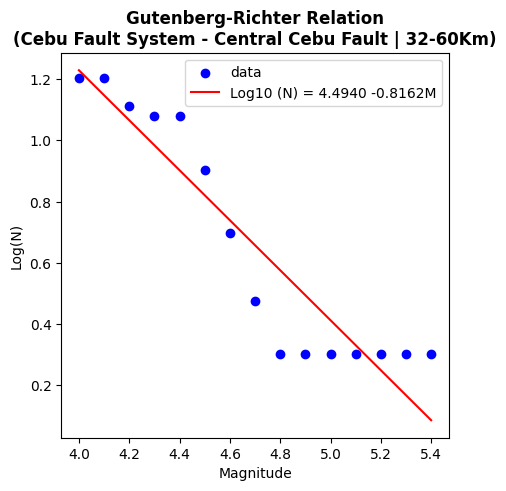

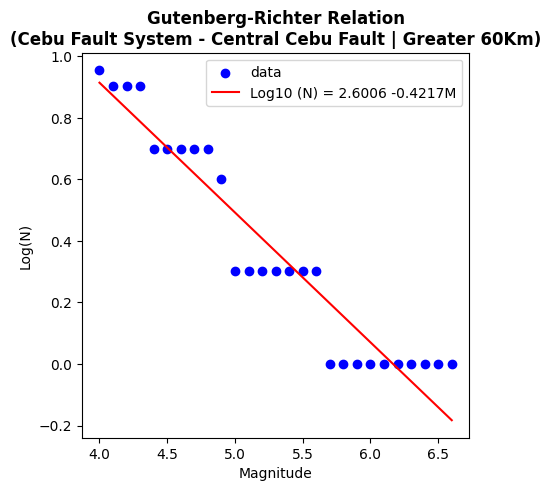

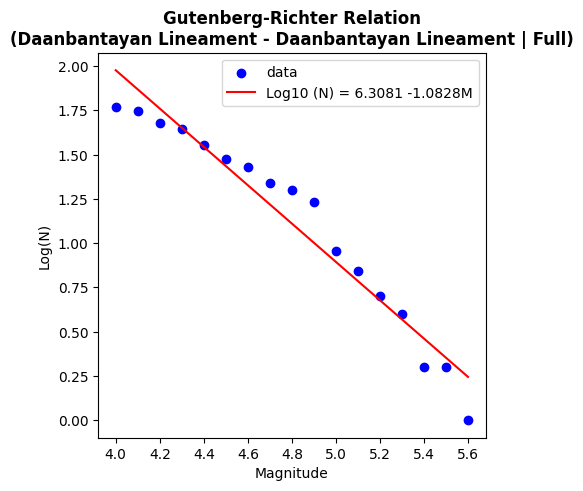

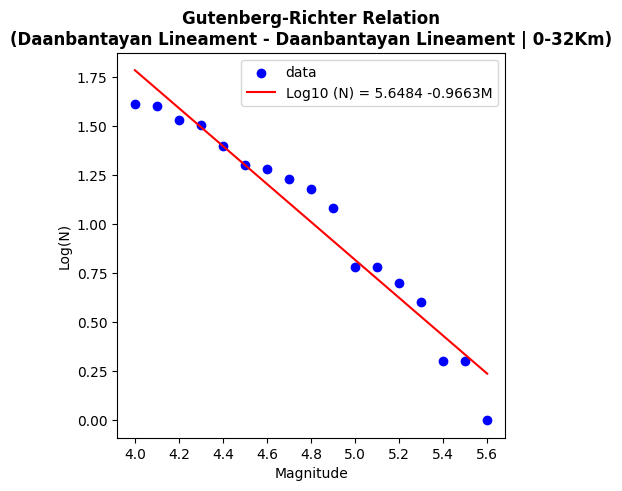

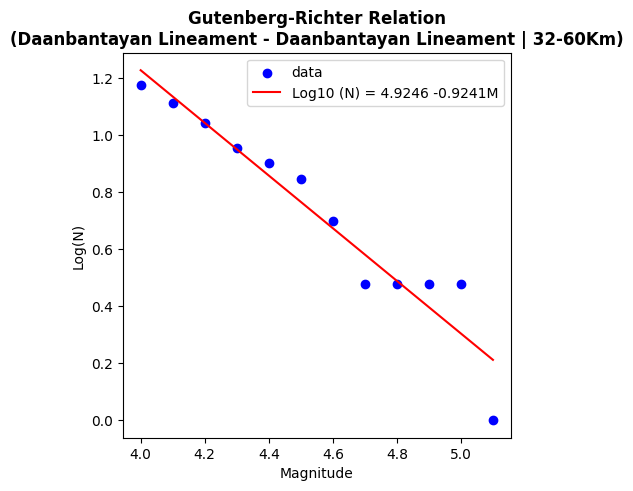

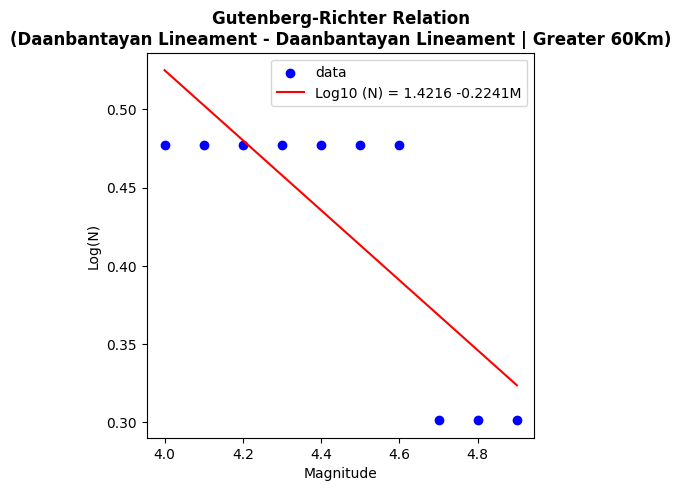

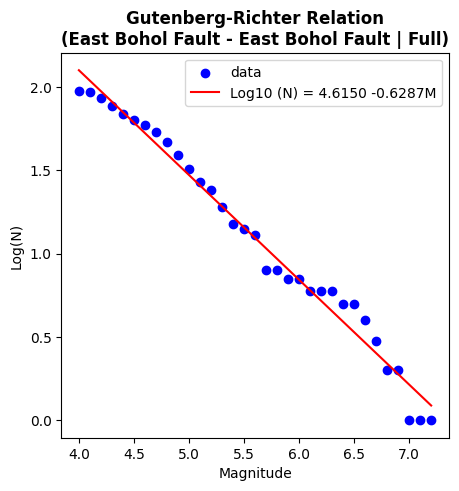

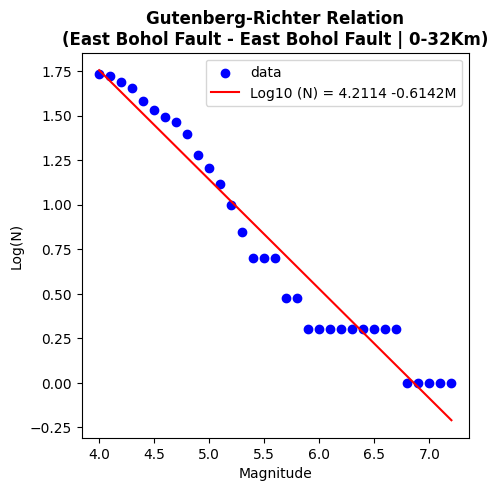

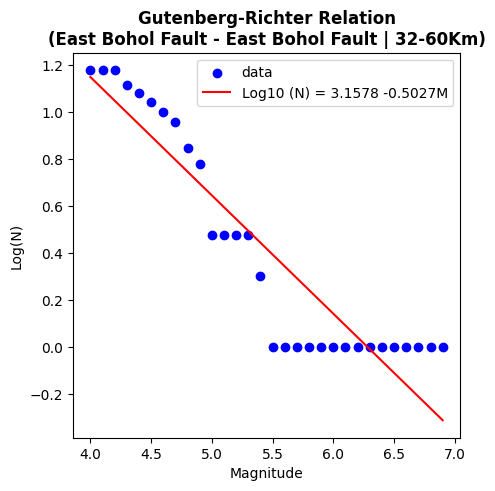

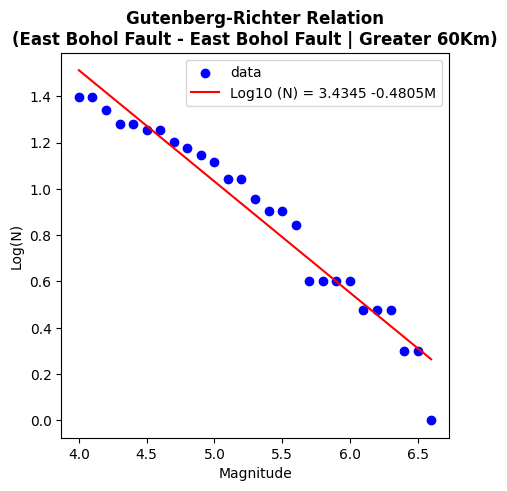

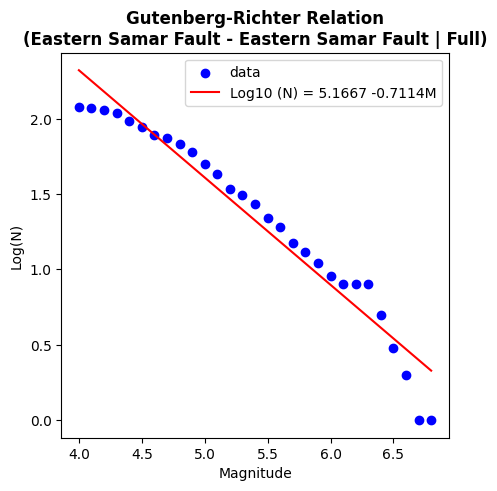

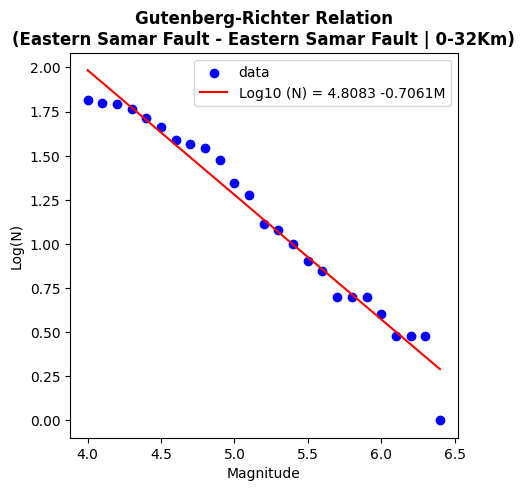

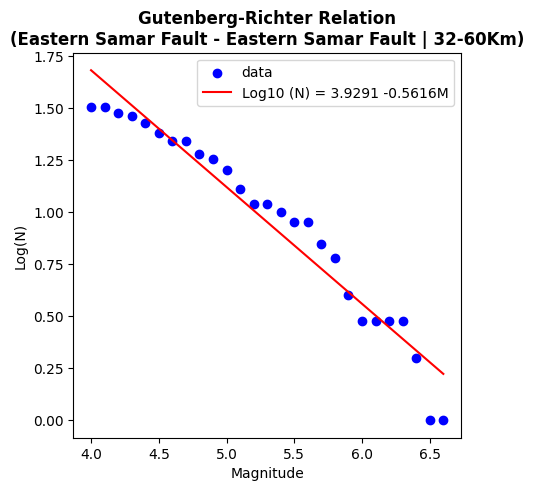

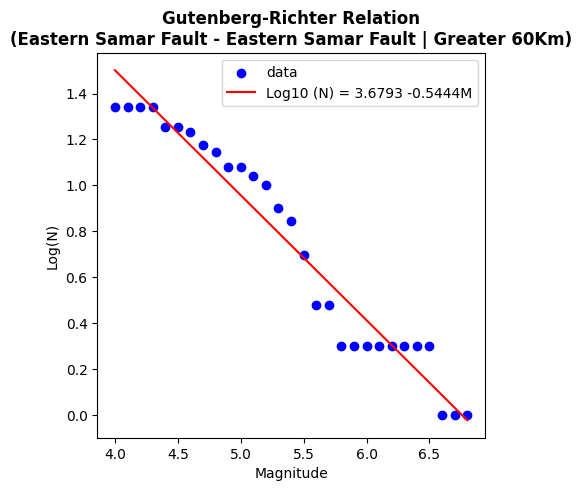

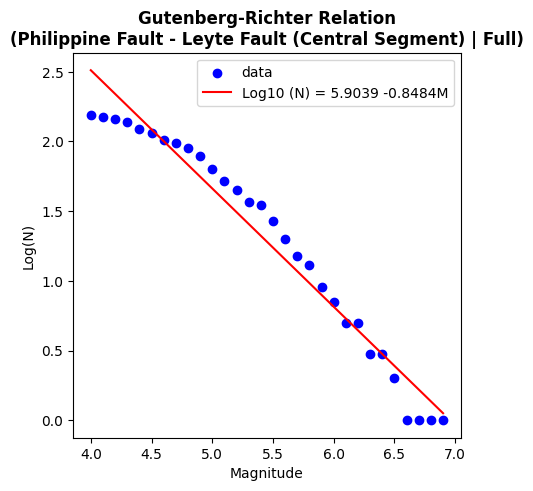

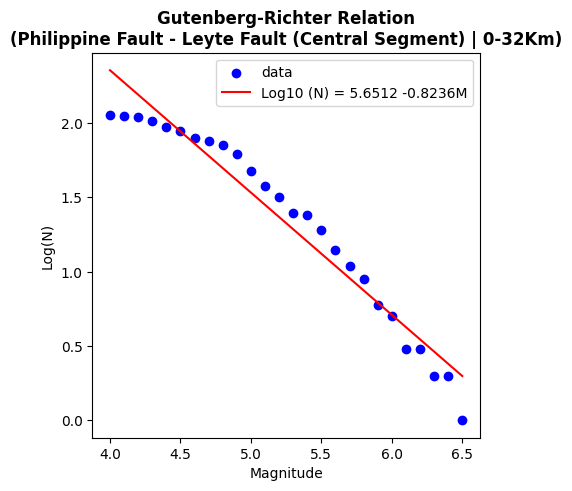

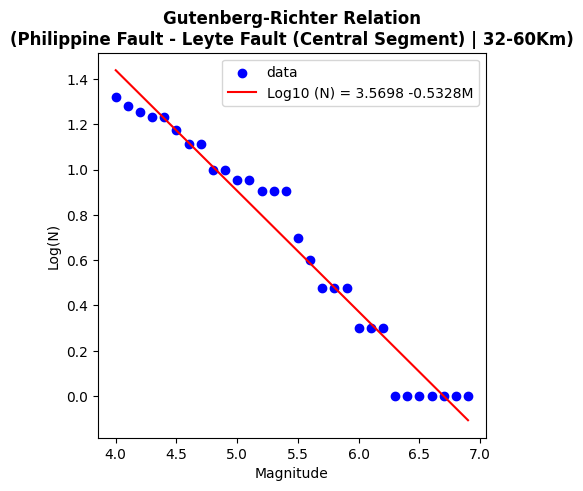

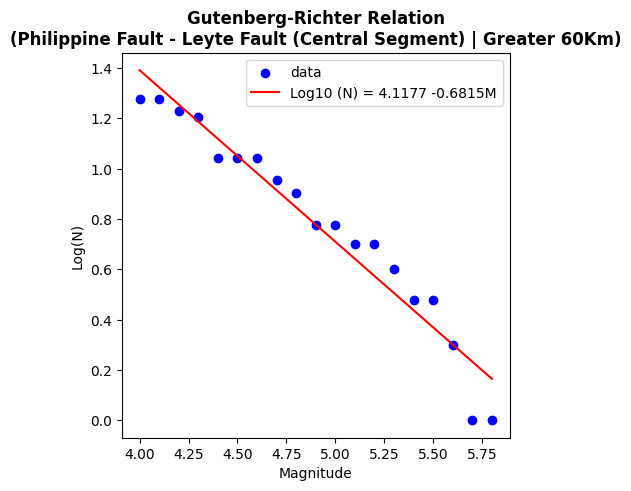

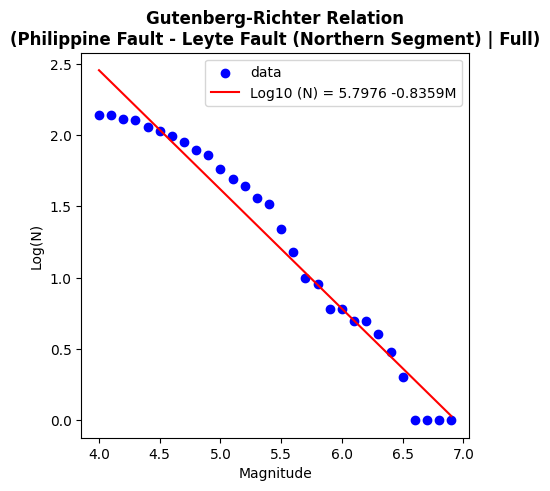

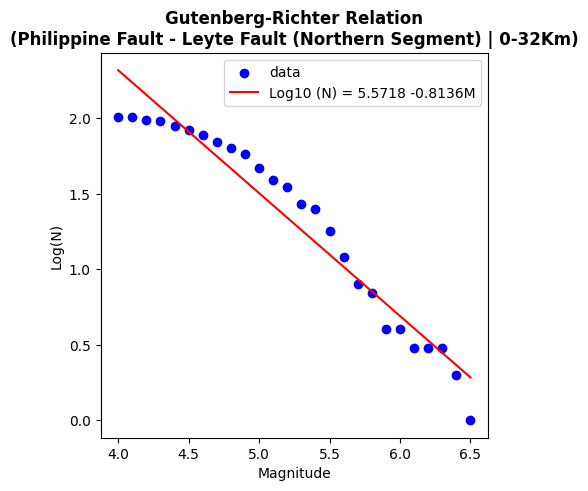

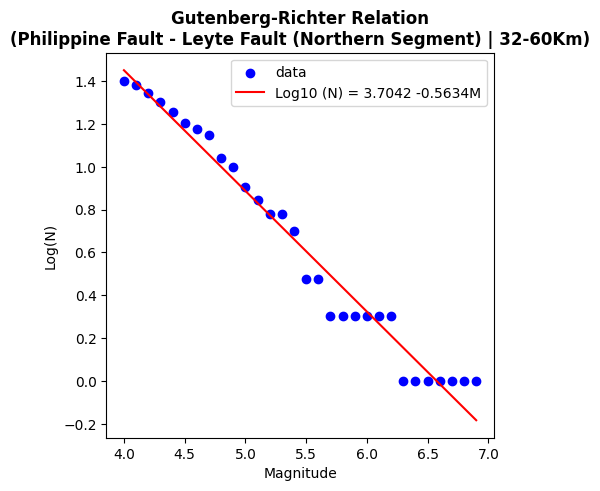

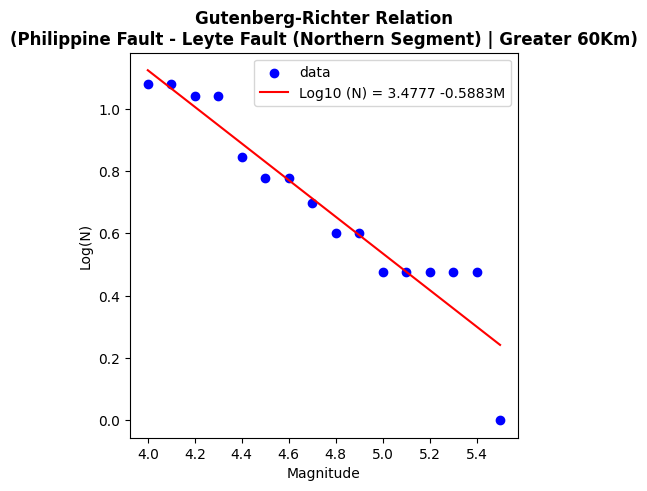

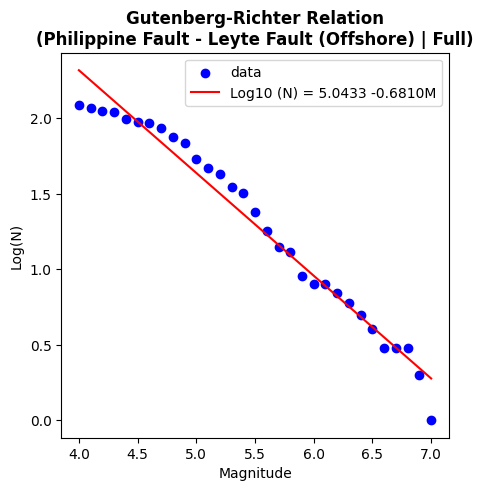

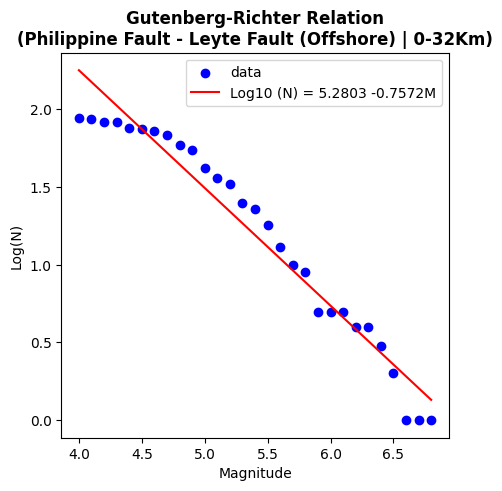

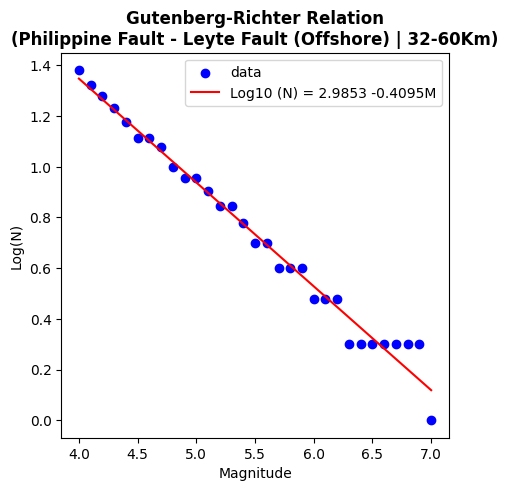

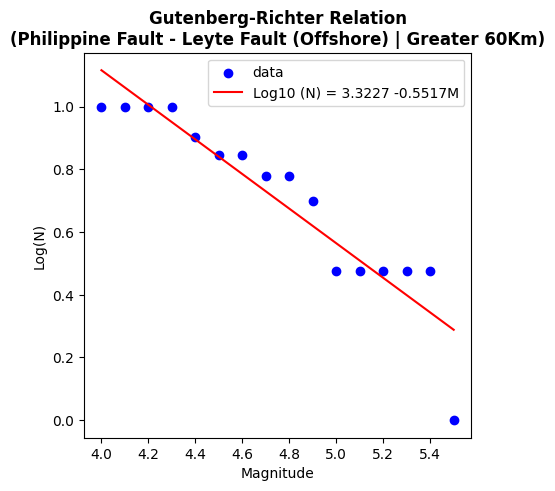

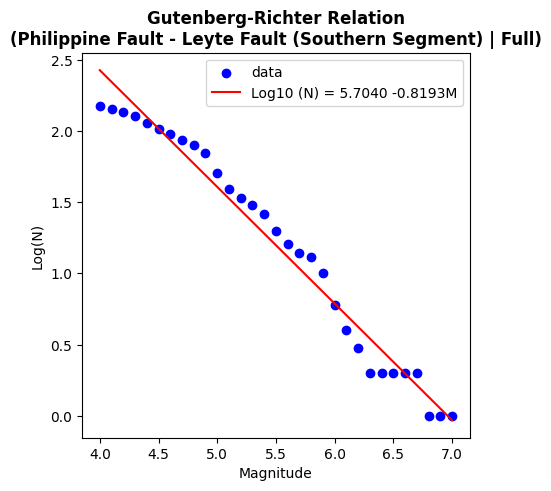

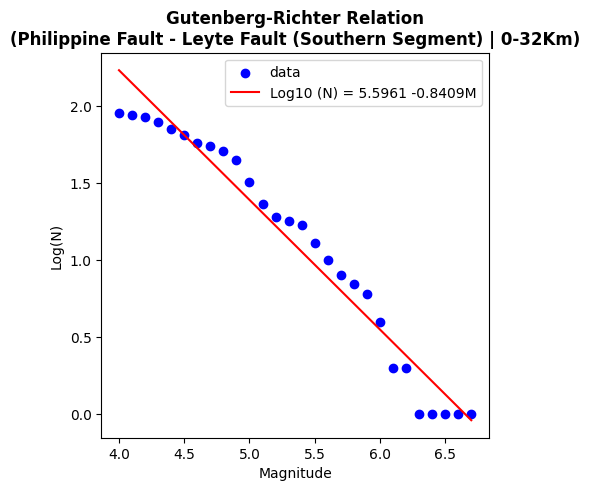

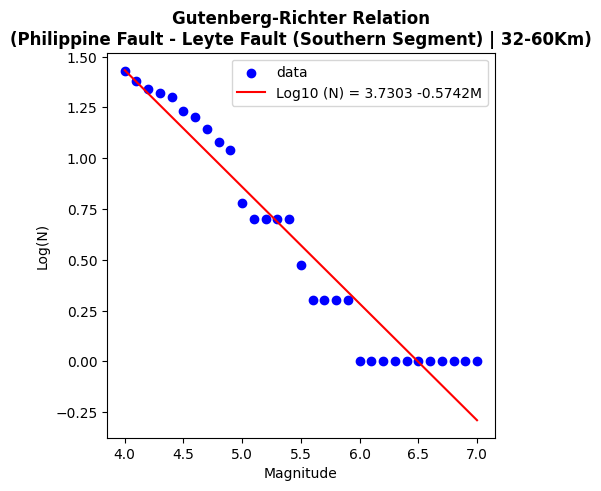

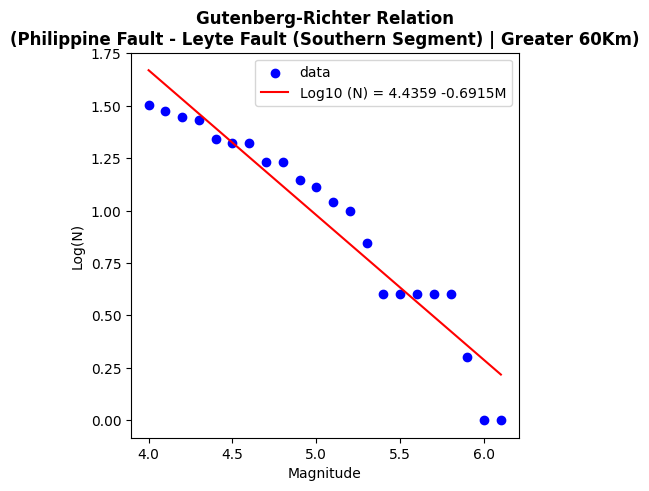

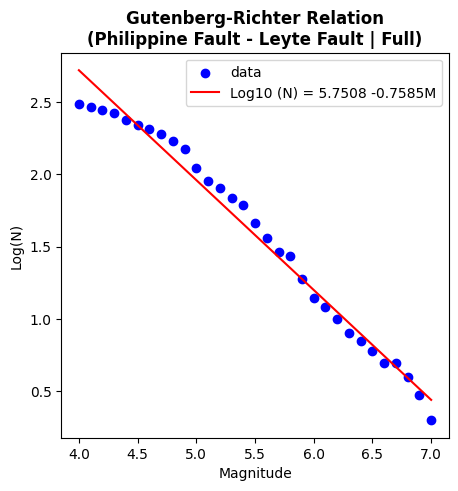

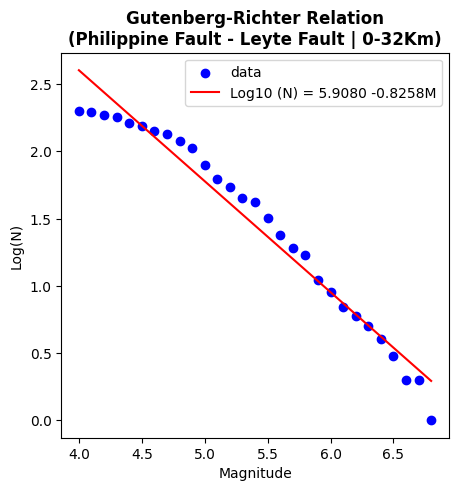

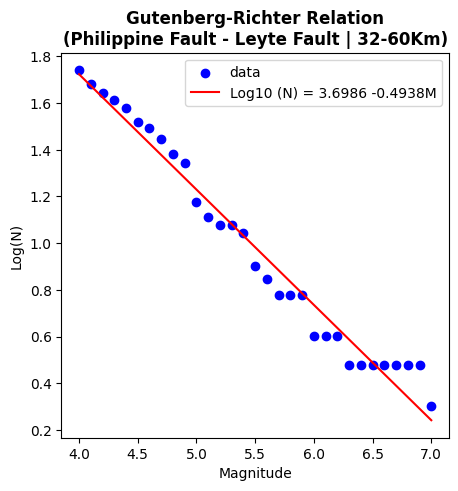

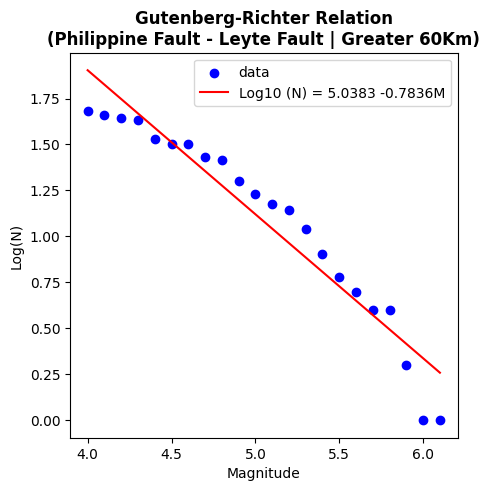

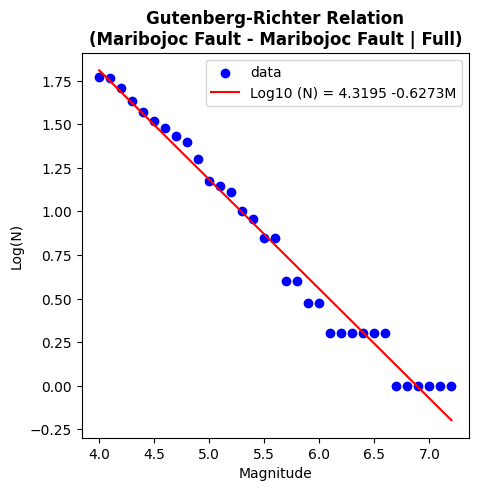

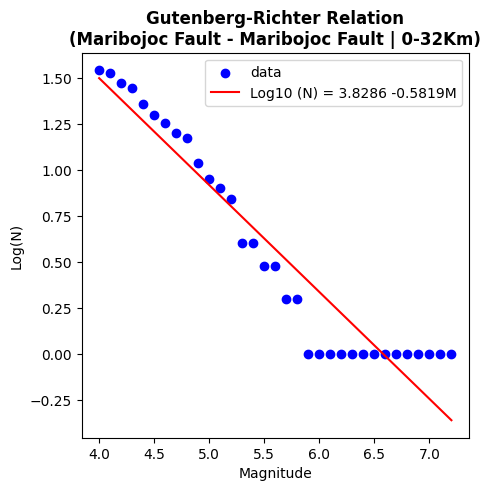

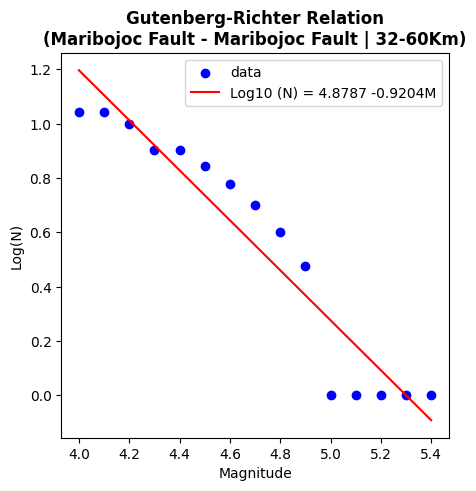

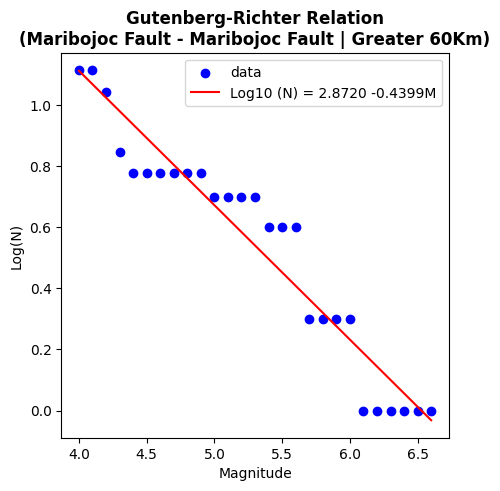

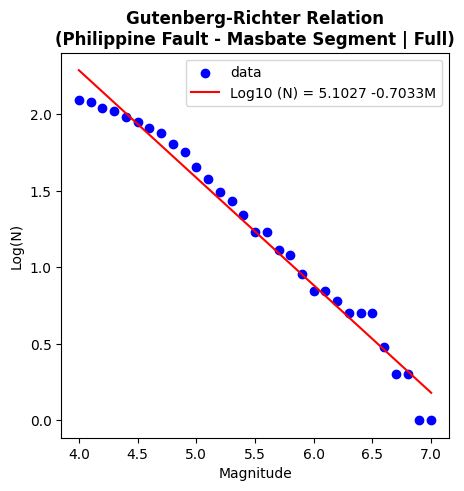

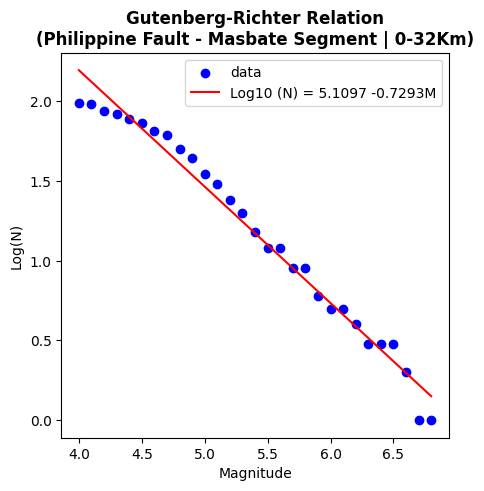

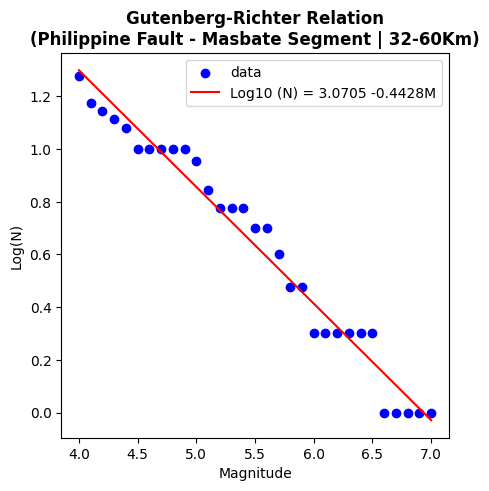

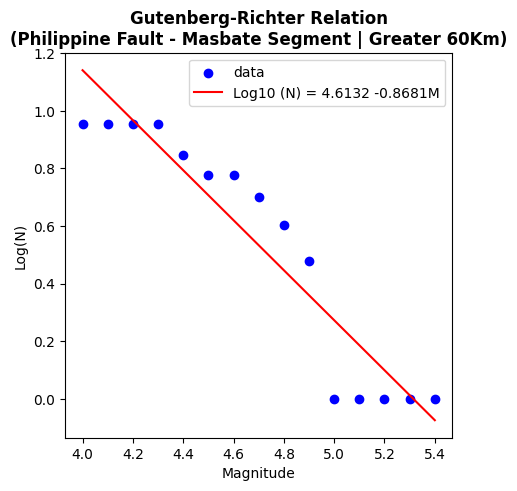

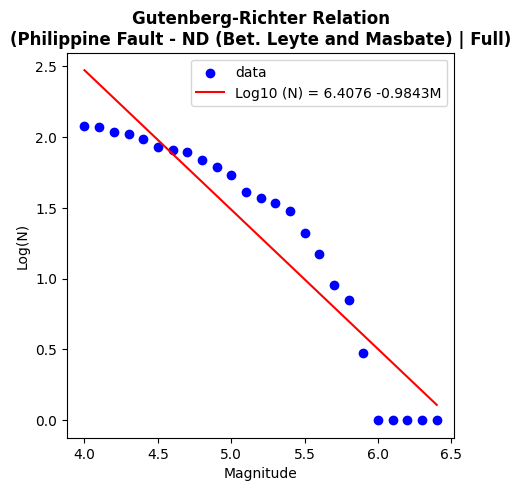

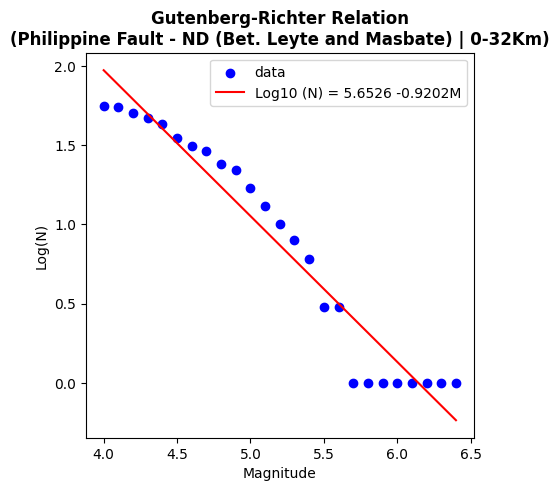

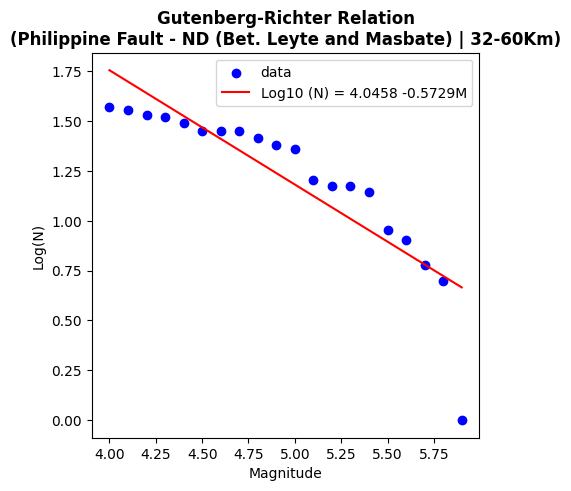

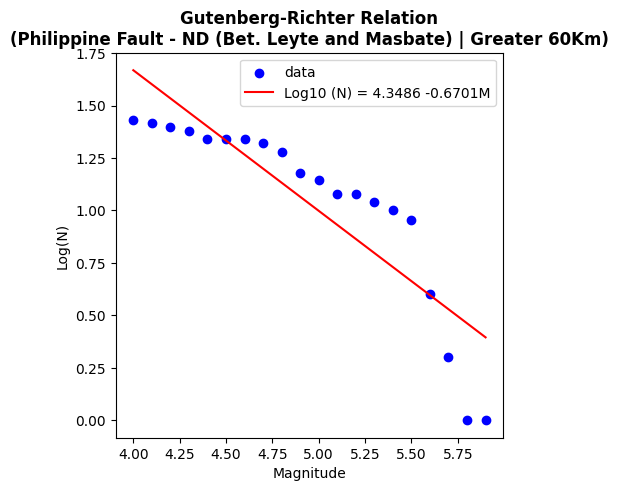

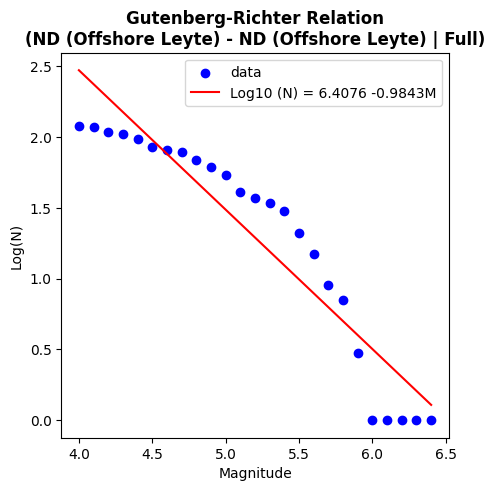

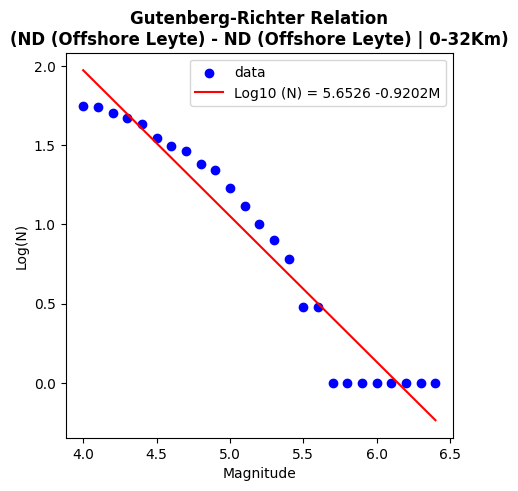

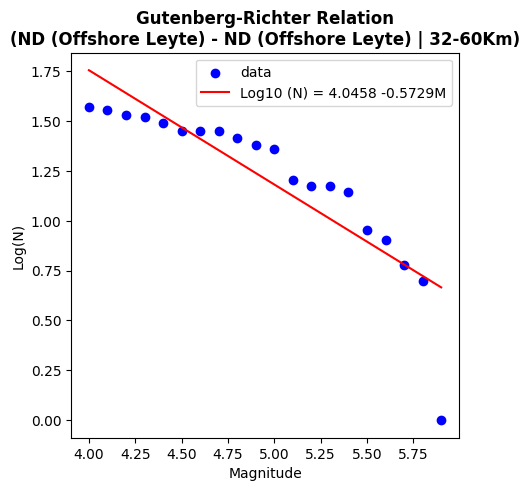

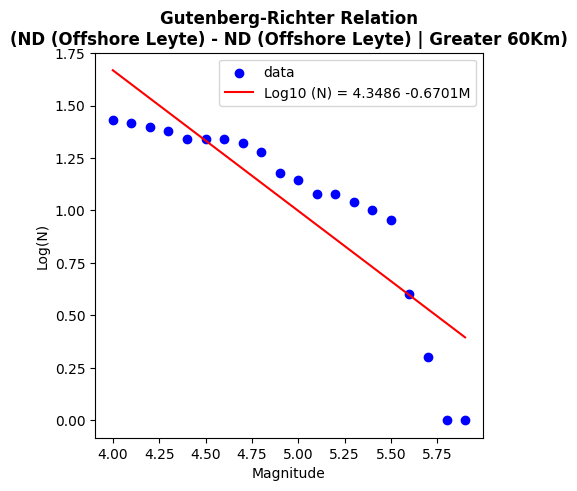

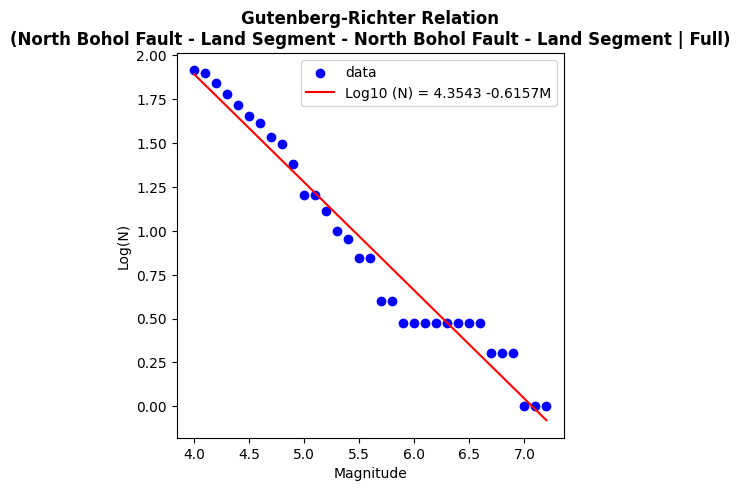

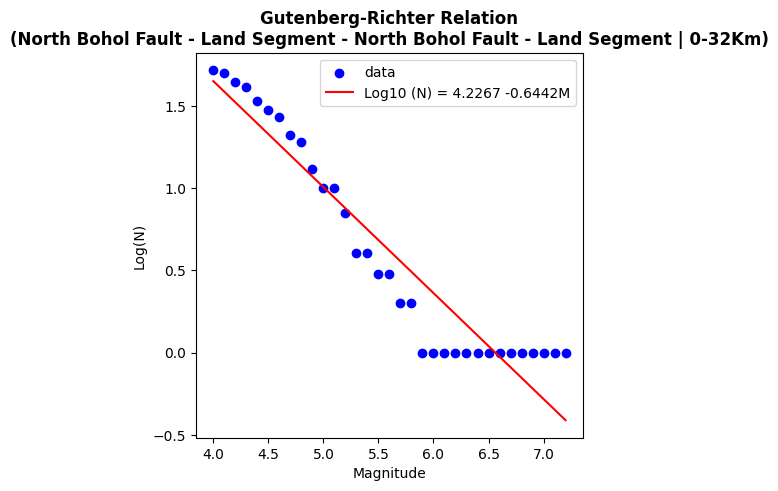

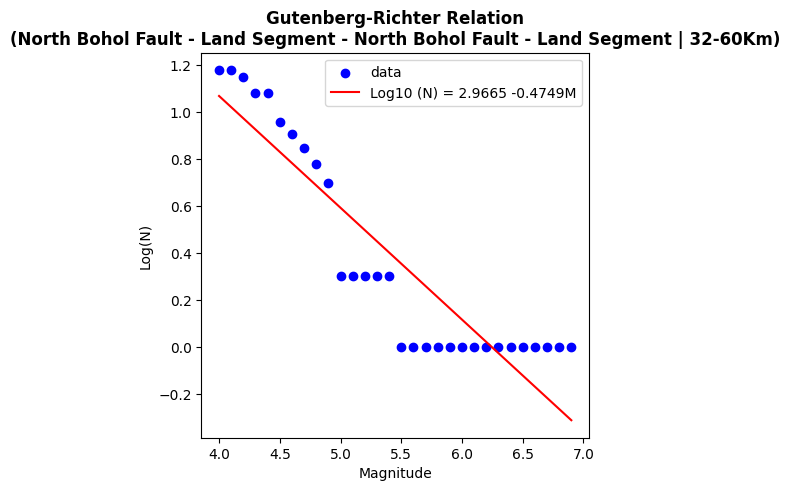

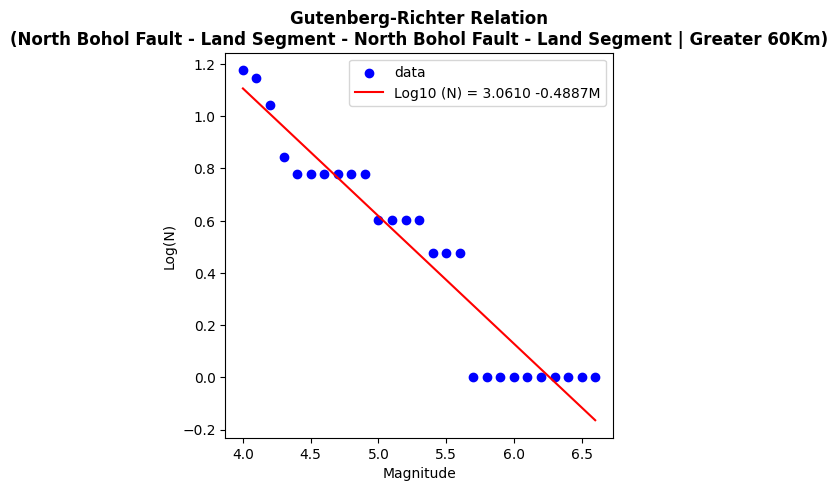

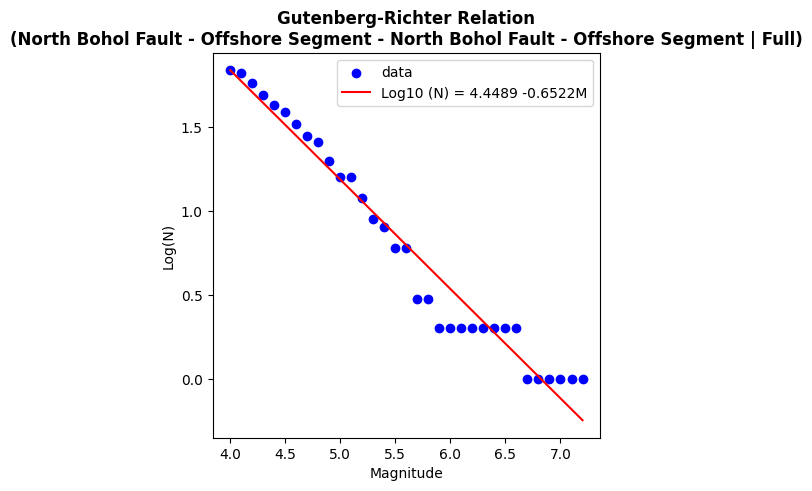

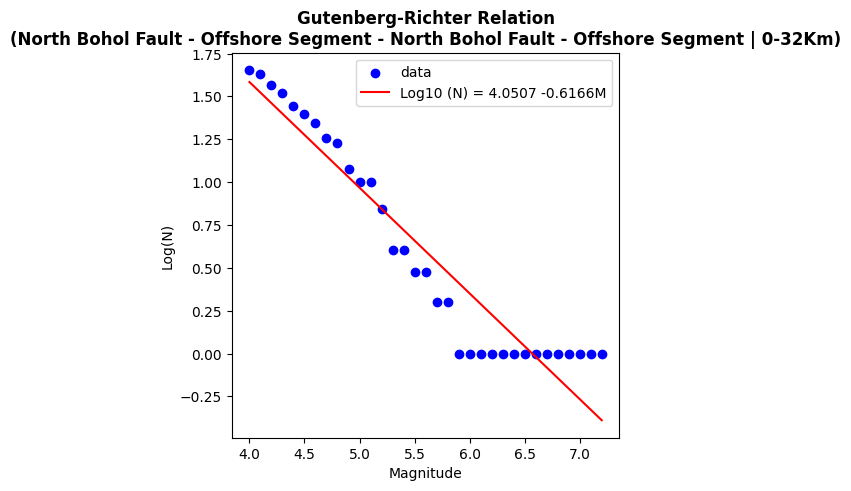

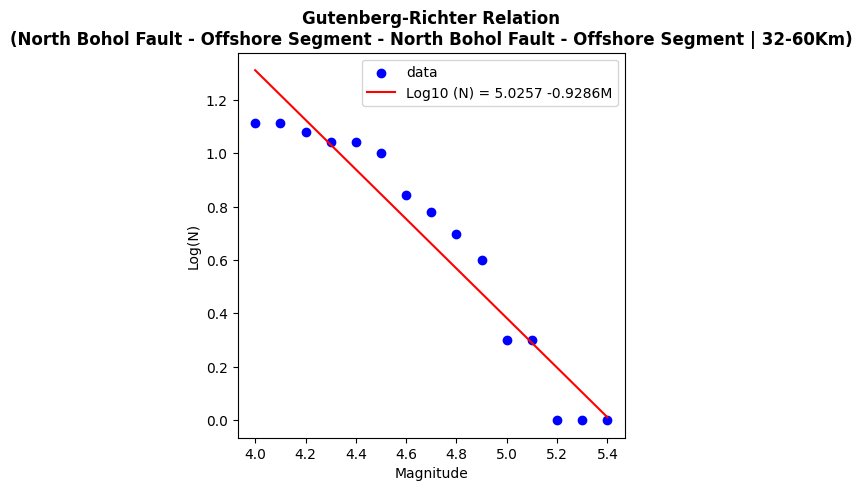

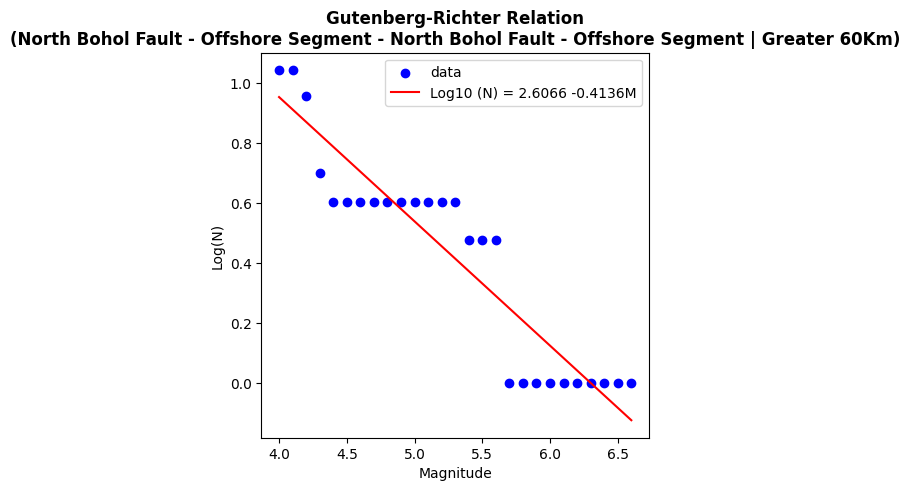

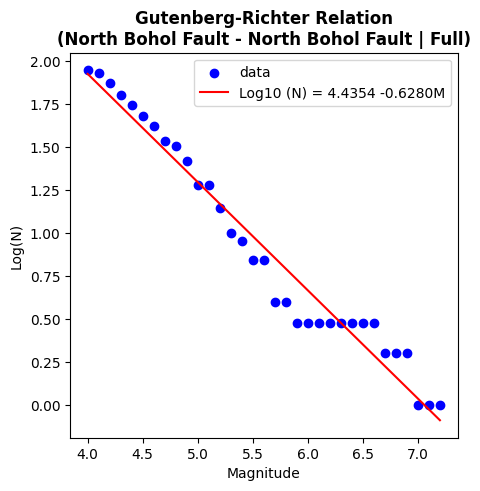

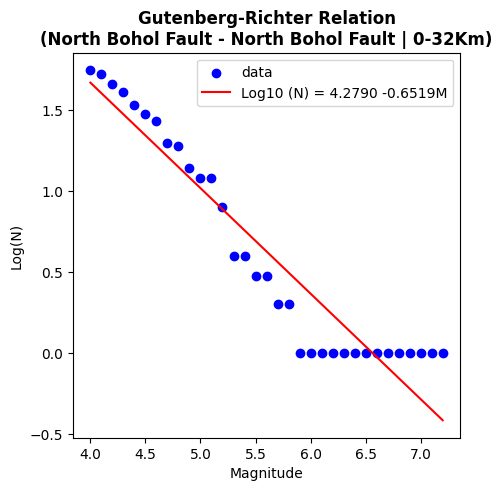

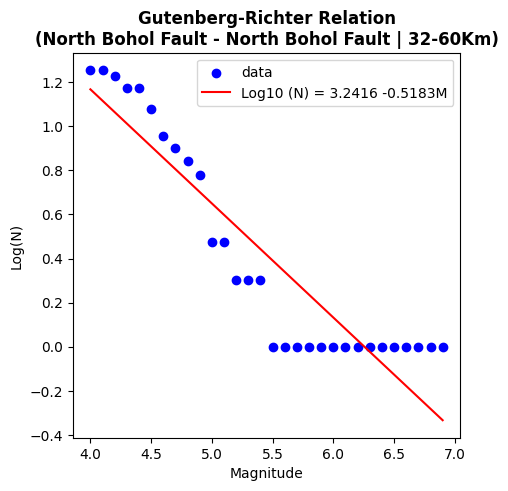

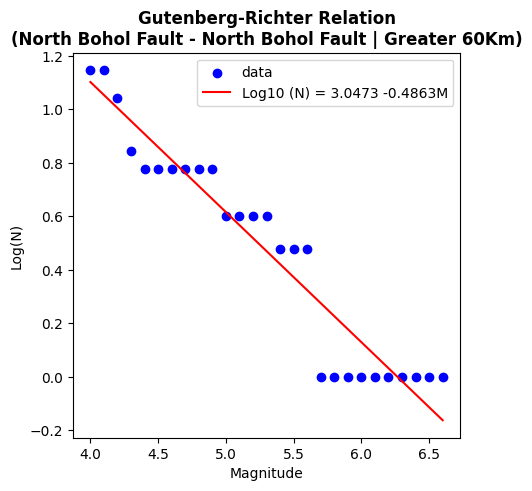

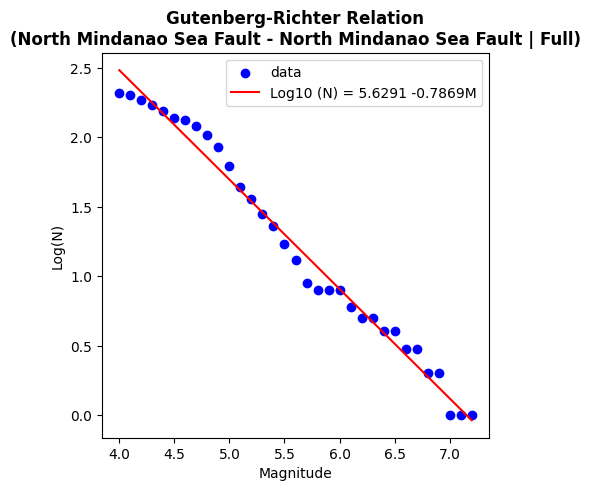

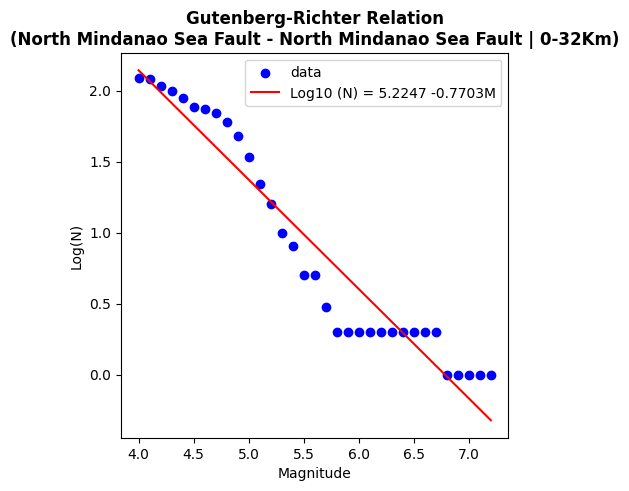

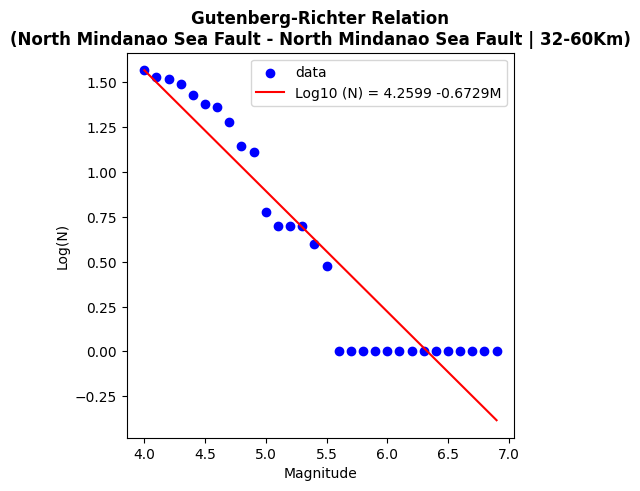

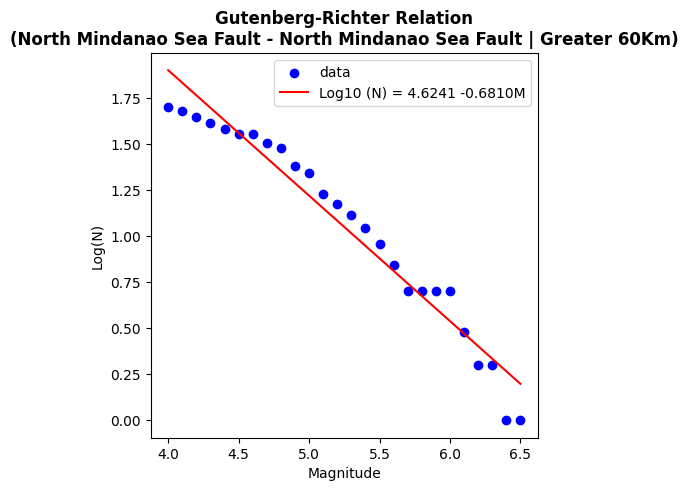

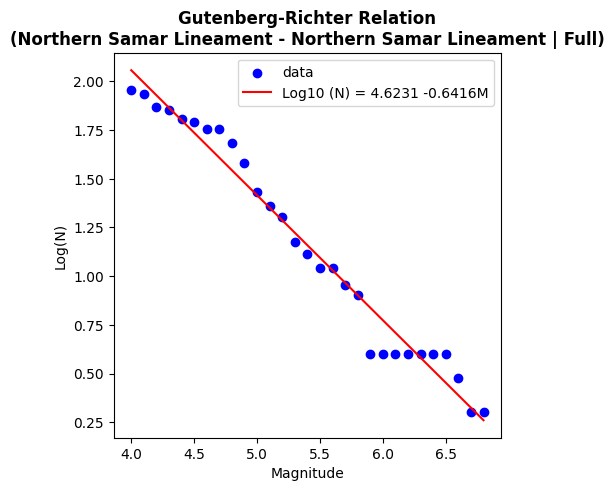

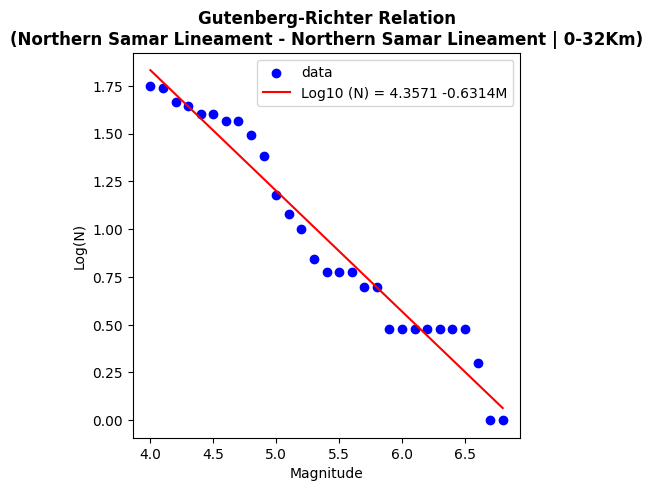

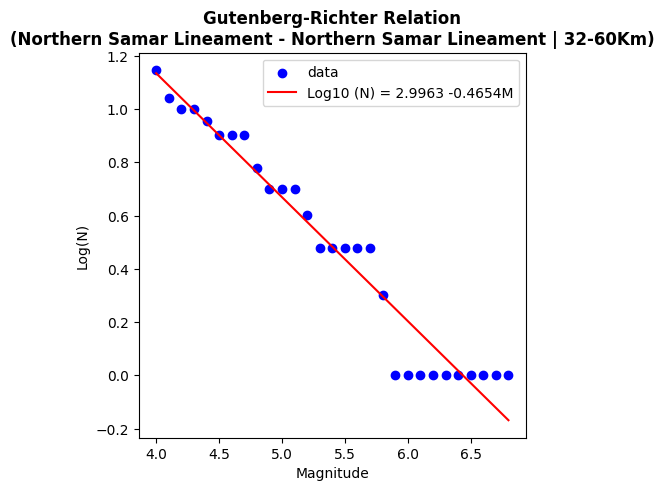

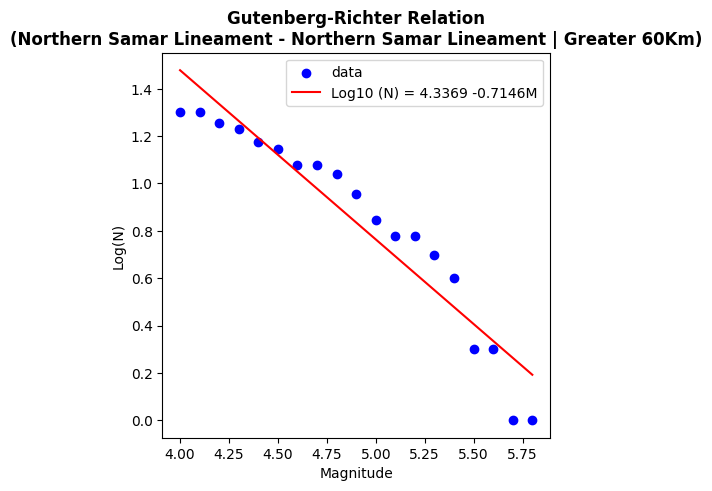

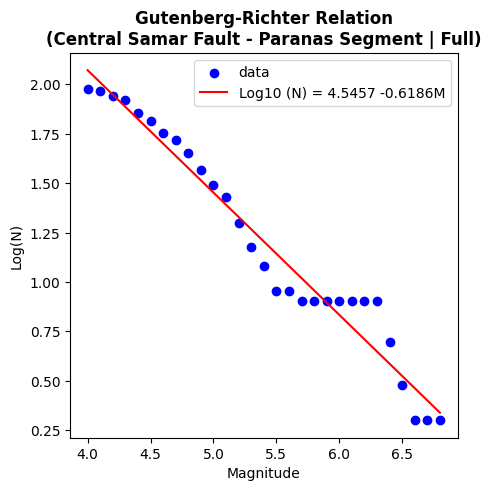

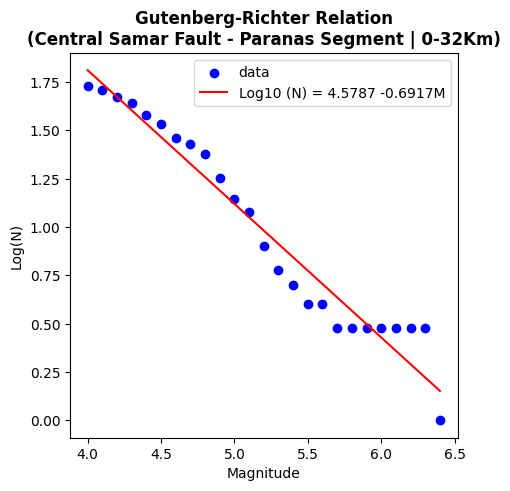

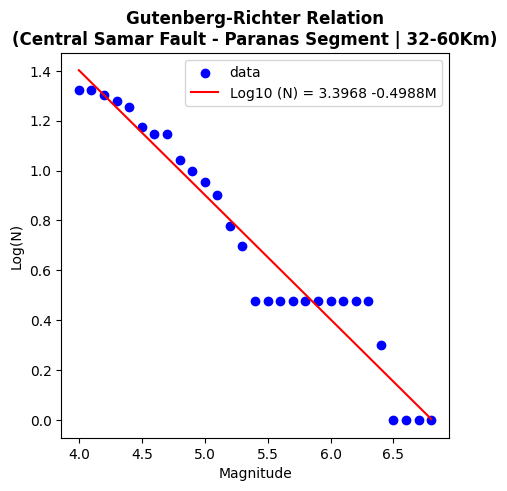

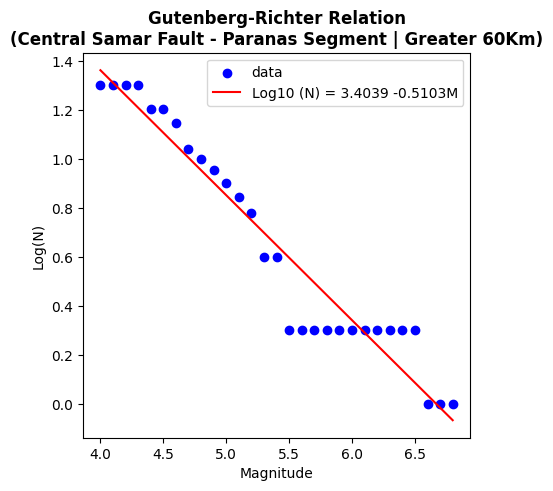

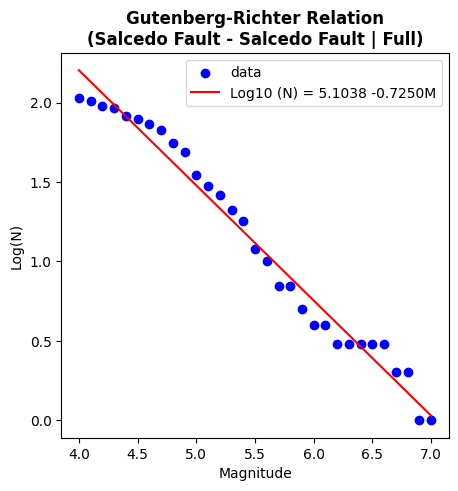

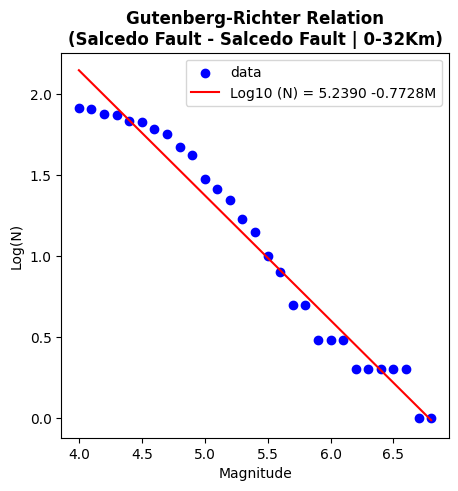

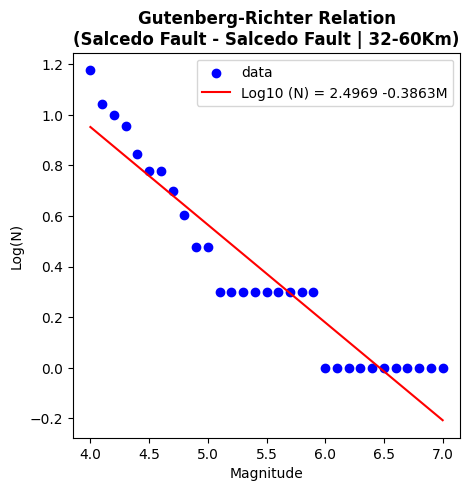

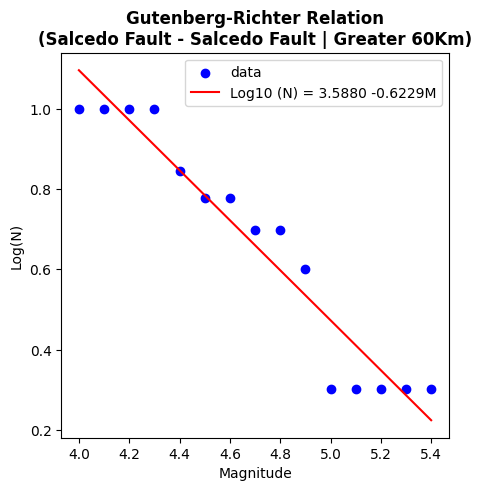

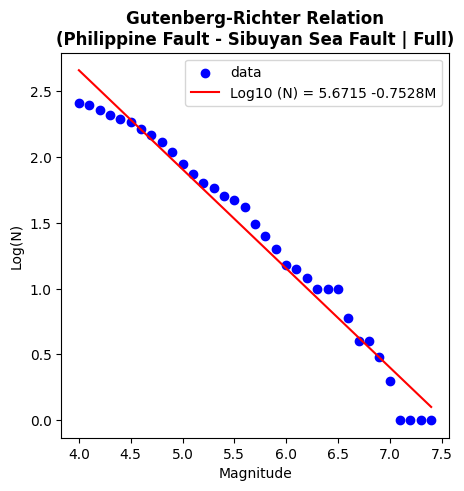

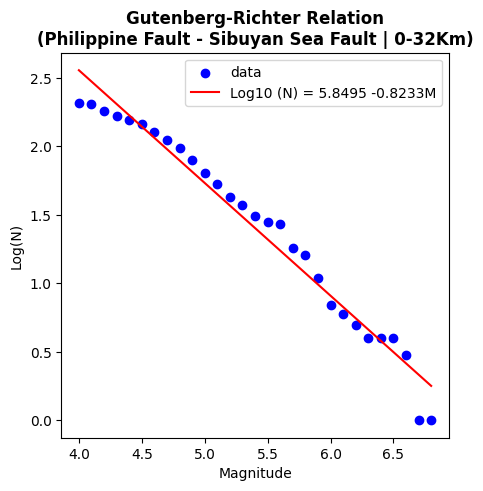

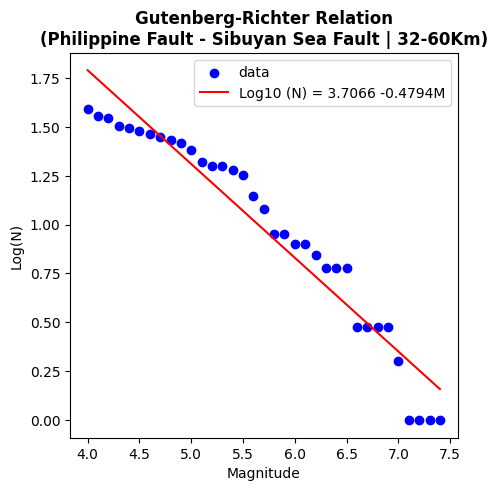

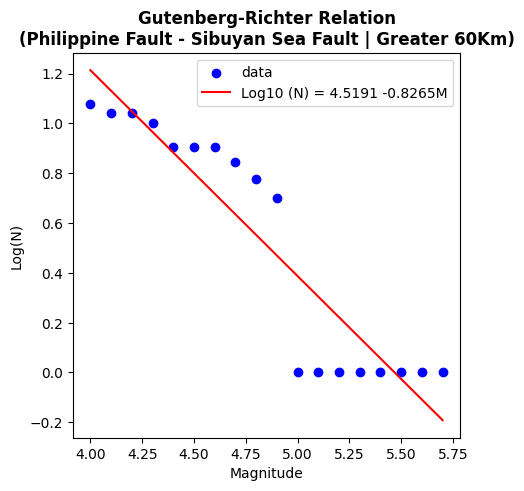

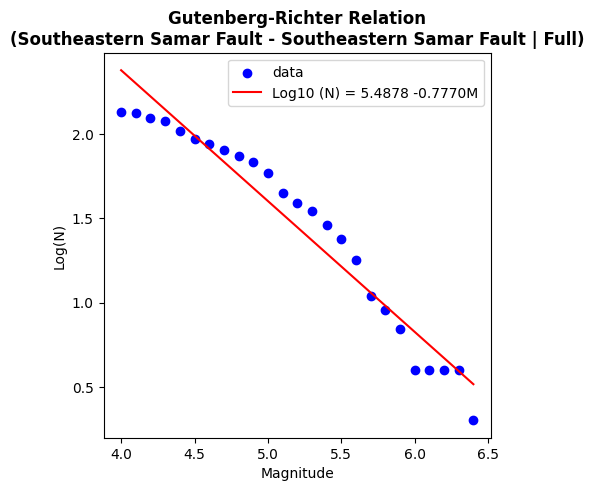

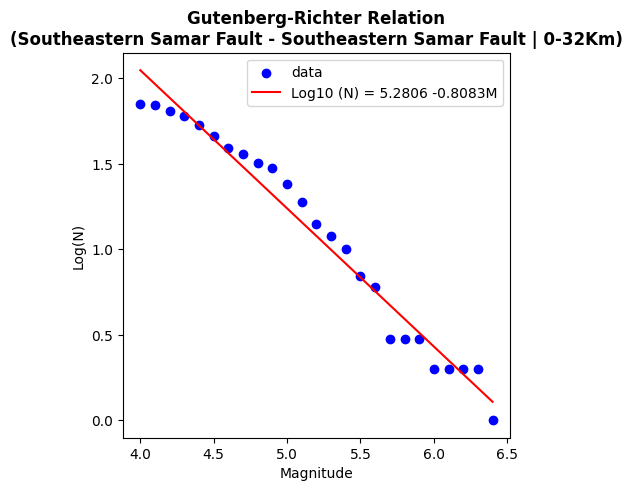

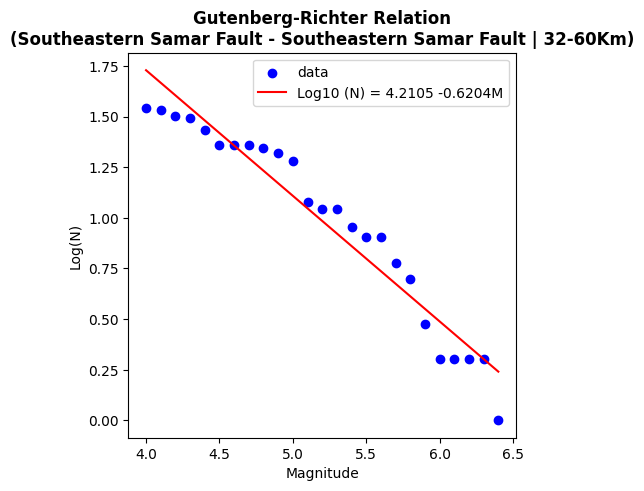

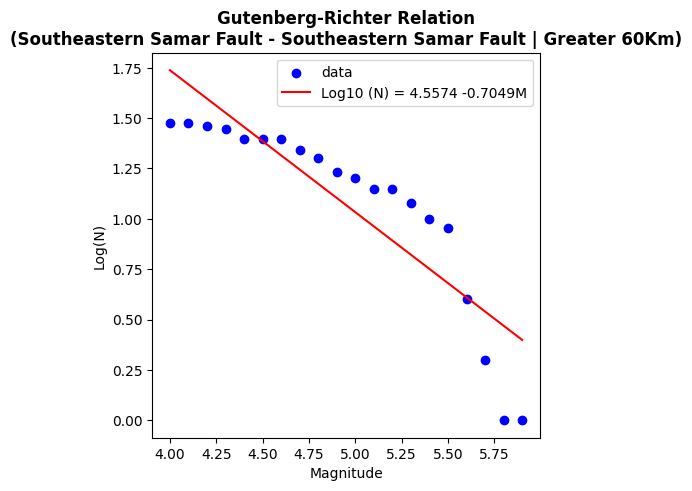

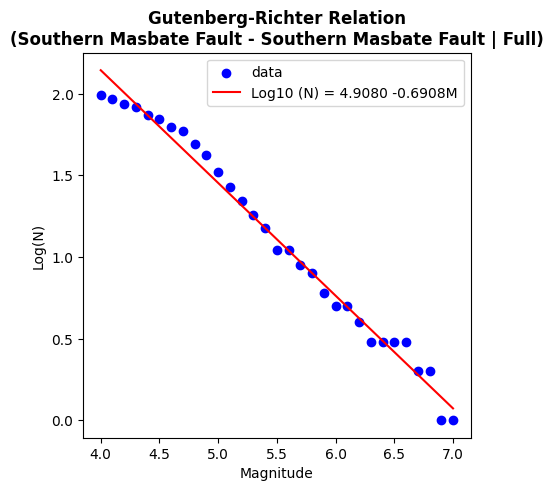

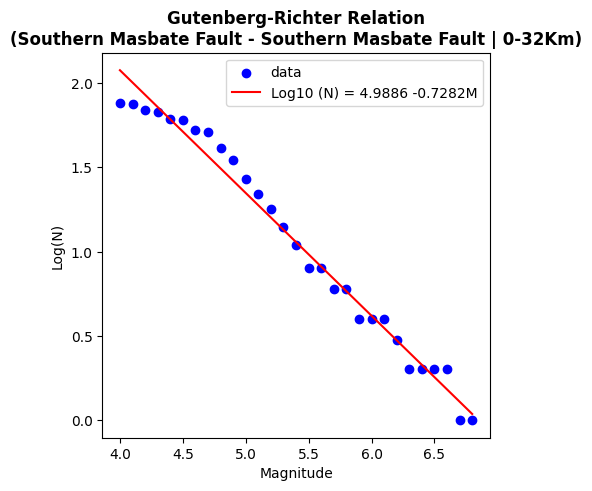

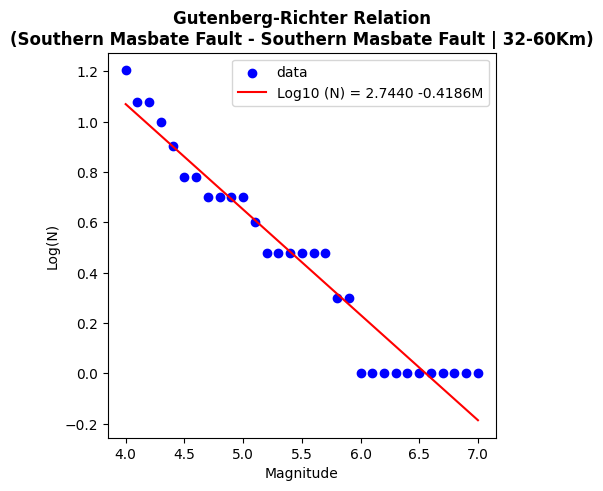

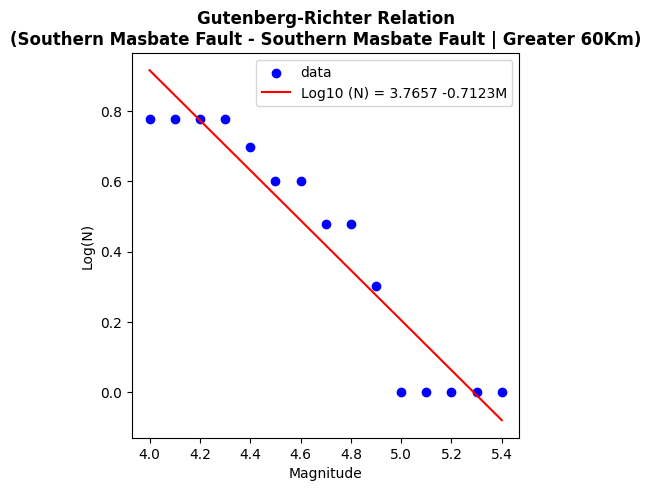

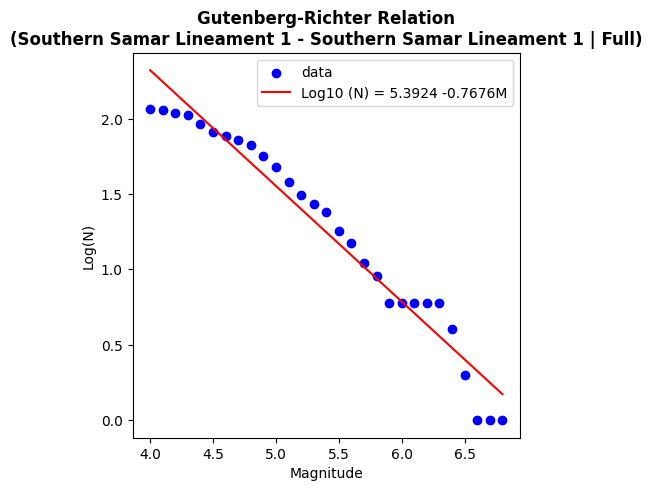

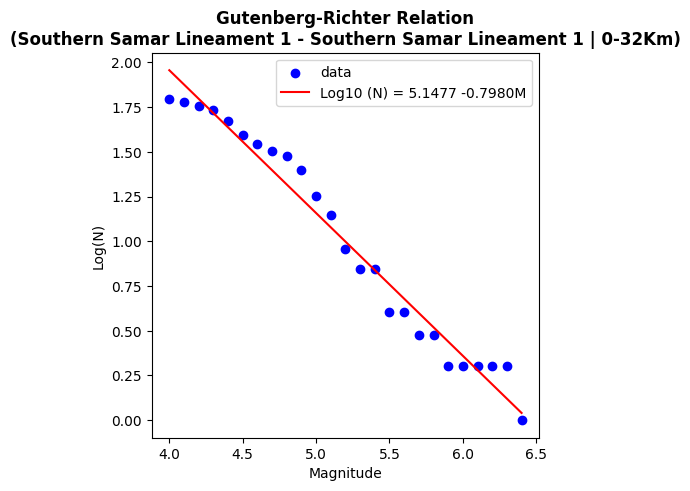

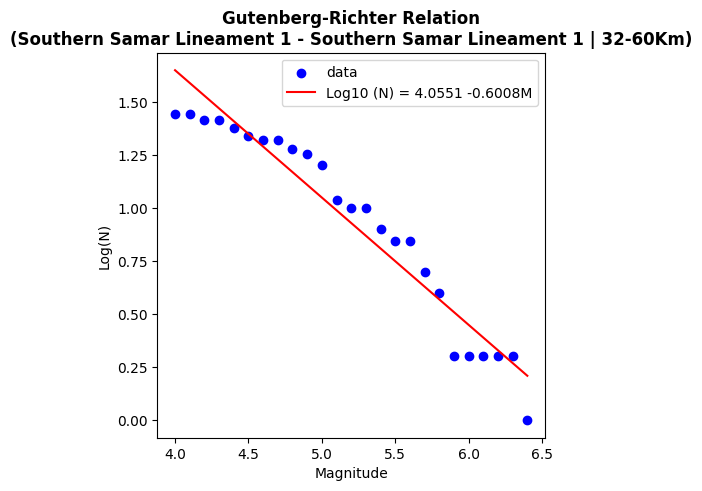

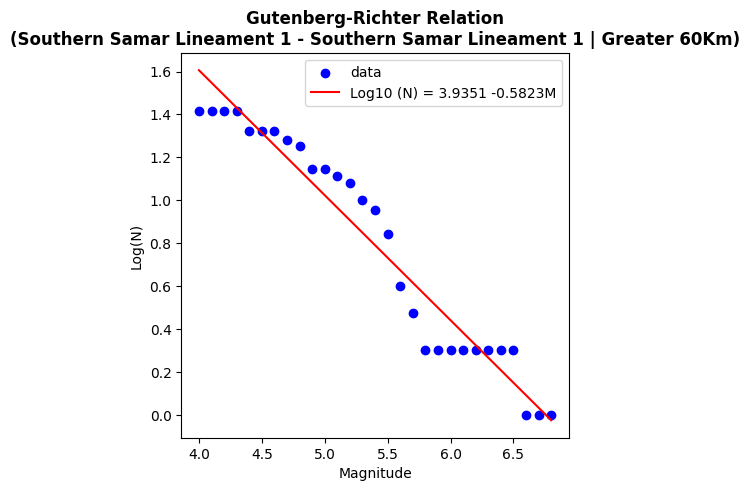

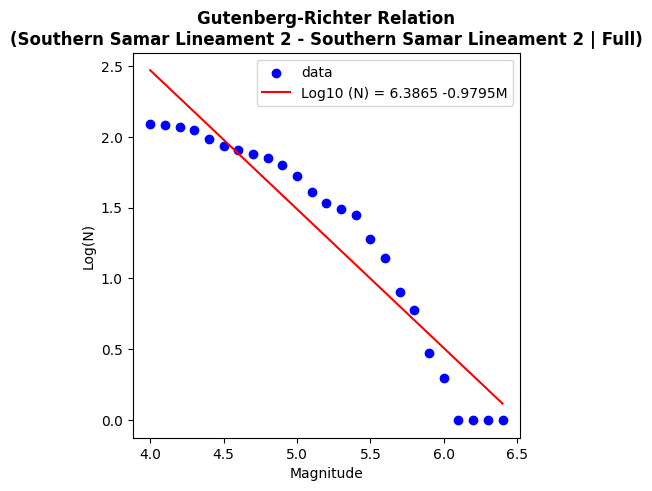

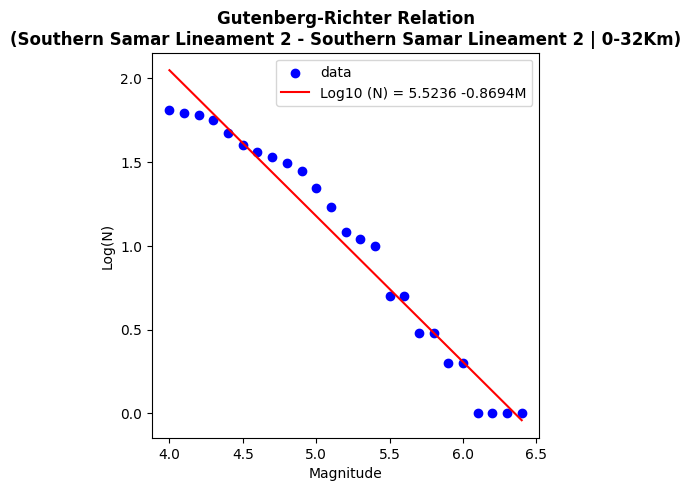

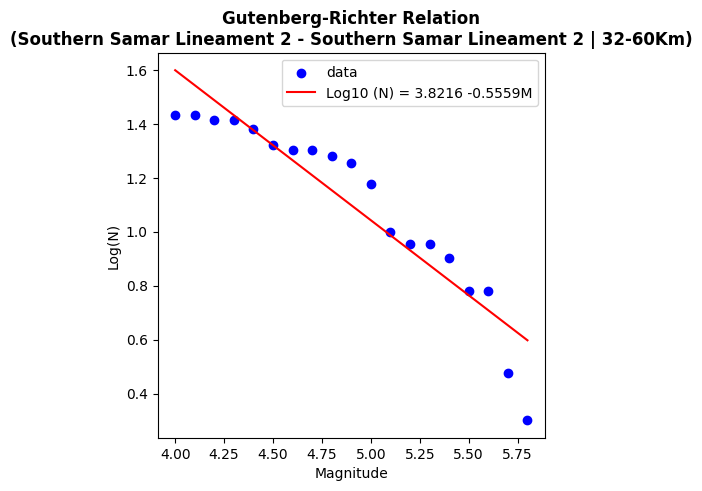

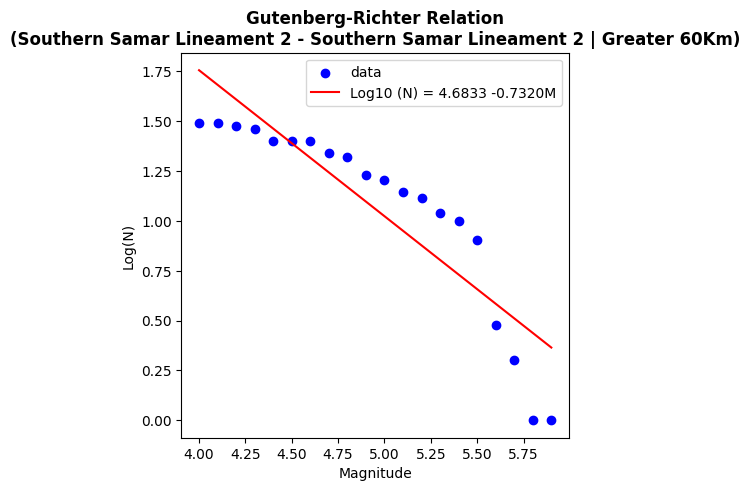

: 

In [13]:
# System related Libraries
import os
import sys
import threading

# Mathematical and Statistical Libraries
import numpy as np
import pandas as pd
import sklearn.linear_model as LinearRegression
from copy import deepcopy

# Plotting Library
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

# Input and Output Folders
input_folder = "./inputs"
output_folder = "./outputs"

# File name to Fault Name and Segment Name mapping
file_segment_mapping = {
    'Bogo Fault': ['Bogo Fault', '20-Bogo Fault'],
    'Central Cebu Fault': ['Cebu Fault System', 'Central Cebu Fault'],
    'Can-avid Segment': ['Central Samar Fault', 'Can-avid Segment'],
    'Calapi Segment': ['Central Samar Fault', 'Calapi Segment'],
    'Paranas Segment': ['Central Samar Fault', 'Paranas Segment'],
    'Daanbantayan Lineament': ['Daanbantayan Lineament', 'Daanbantayan Lineament'],
    'East Bohol Fault': ['East Bohol Fault', 'East Bohol Fault'],
    'Calatrava-Toboso Fault': ['East Negros Fault System', 'Calatrava-Toboso Fault'],
    'Eastern Samar Fault': ['Eastern Samar Fault', 'Eastern Samar Fault'],
    'Maribojoc Fault': ['Maribojoc Fault', 'Maribojoc Fault'],
    'North Bohol Fault': ['North Bohol Fault', 'North Bohol Fault'],
    'North Bohol Fault - Land': ['North Bohol Fault', 'North Bohol Fault - Land'],
    'North Bohol Fault - Offshore': ['North Bohol Fault', 'North Bohol Fault - Offshore'],
    'North Mindanao Sea Fault': ['North Mindanao Sea Fault', 'North Mindanao Sea Fault'],
    'Northern Samar Lineament': ['Northern Samar Lineament', 'Northern Samar Lineament'],
    'Sibuyan Sea Fault': ['Philippine Fault', 'Sibuyan Sea Fault'],
    'ND (Bet. Leyte and Masbate)': ['Philippine Fault', 'ND (Bet. Leyte and Masbate)'],
    'Salcedo Fault': ['Salcedo Fault', 'Salcedo Fault'],
    'Leyte Fault': ['Philippine Fault', 'Leyte Fault'],
    'Leyte Fault (Offshore)': ['Philippine Fault', 'Leyte Fault (Offshore)'],
    'Leyte Fault (Northern Segment)': ['Philippine Fault', 'Leyte Fault (Northern Segment)'],
    'Leyte Fault (Central Segment)': ['Philippine Fault', 'Leyte Fault (Central Segment)'],
    'Leyte Fault (Southern Segment)': ['Philippine Fault', 'Leyte Fault (Southern Segment)'],
    'Masbate Segment': ['Philippine Fault', 'Masbate Segment'],
    'Southeastern Samar Fault': ['Southeastern Samar Fault', 'Southeastern Samar Fault'],
    'Southern Masbate Fault': ['Southern Masbate Fault', 'Southern Masbate Fault'],
    'Southern Samar Lineament 1': ['Southern Samar Lineament 1', 'Southern Samar Lineament 1'],
    'Southern Samar Lineament 2': ['Southern Samar Lineament 2', 'Southern Samar Lineament 2'],
}

# Get a list of all files in the input folder
input_files = os.listdir(input_folder)

# Create a DataFrame to store the a and b values
ab_values_df = pd.DataFrame(columns=['Filename', 'Depth Range', 'a-value', 'b-value'])

# Process each input file
for input_file in input_files:
    # Get the file name without extension
    filename = os.path.splitext(input_file)[0]
    filename = filename.replace("50-", "")

    # Get the fault name and segment name from the mapping
    fault_name, segment_name = file_segment_mapping.get(filename, [filename, filename])

    # Set the output file name
    outputfilename = f"{fault_name} - {segment_name}"

    # CSV Data set import
    input_path = os.path.join(input_folder, input_file)
    df = pd.read_csv(input_path)

    # Filter rows based on depth ranges
    df_0_32 = df[df['depth'] <= 32]
    df_32_60 = df[(df['depth'] > 32) & (df['depth'] <= 60)]
    df_greater_60 = df[df['depth'] > 60]
    df_original_copy = df

    # Define depth ranges
    depth_ranges = [
        {'name': 'Full'},
        {'name': '0-32Km', 'max_depth': 32},
        {'name': '32-60Km', 'min_depth': 32, 'max_depth': 60},
        {'name': 'Greater 60Km', 'min_depth': 60},
    ]

    # Create a folder for the output files of the current input file
    output_file_folder = os.path.join(output_folder, outputfilename)
    os.makedirs(output_file_folder, exist_ok=True)

    df_0_32.to_csv(os.path.join(output_file_folder, f'{outputfilename} (0-32).csv'), index=False)
    df_32_60.to_csv(os.path.join(output_file_folder, f'{outputfilename} (32-60).csv'), index=False)
    df_greater_60.to_csv(os.path.join(output_file_folder, f'{outputfilename} (60).csv'), index=False)
    df_original_copy.to_csv(os.path.join(output_file_folder, f'{outputfilename} (Full).csv'), index=False)

    ab_values = []

    # Process data for each depth range
    for depth_range in depth_ranges:
        name = depth_range['name']
        min_depth = depth_range.get('min_depth', 0)
        max_depth = depth_range.get('max_depth', np.inf)

        # Retrieve the corresponding filtered DataFrame
        if name == '0-32Km':
            filtered_df = df_0_32
        elif name == '32-60Km':
            filtered_df = df_32_60
        elif name == 'Greater 60Km':
            filtered_df = df_greater_60
        elif name == 'Full':
            filtered_df = df

        y = filtered_df['magnitude']
        Min_mag = 4
        Max_mag = 8
        Mag_bin = 0.1

        count_dict = {}
        promptFOR = ""
        for i in np.arange(Min_mag, Max_mag, Mag_bin):
            count = sum([1 for y_val in y if y_val >= i])
            if count == 0:
                break
            count_dict[i] = count
            promptFOR += " %0.1f\t\t%i\t\t%0.3f\n" % (i, count_dict[i], np.log10(count_dict[i]))

        dfcum = pd.DataFrame.from_dict(count_dict, orient='index', columns=['count'])
        dfcum.reset_index(inplace=True)
        dfcum.rename(columns={'index': 'magnitude_Bin'}, inplace=True)
        dfcum.sort_values('magnitude_Bin', inplace=True)
        dfcum['Log10(count)'] = np.log10(dfcum['count'])

        x = dfcum['magnitude_Bin']
        y = dfcum['Log10(count)']
        # Fit a first-degree polynomial
        coefficients = np.polyfit(x, y, 1)

        # Generate points on the trendline
        trendline_x = np.linspace(x.min(), x.max(), 100)
        trendline_y = np.polyval(coefficients, trendline_x)

        b, a = coefficients

        # Plot the data and trendline
        fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
        ax.scatter(x, y, color='blue')
        ax.plot(trendline_x, trendline_y, color='red')
        if b >= 0:
            leg = 'Log10 (N) = %.4f+%.4fM' % (a, b)
        else:
            leg = 'Log10 (N) = %.4f %.4fM' % (a, b)

        ax.legend(["data", leg], loc="upper right")
        ax.set_xlabel('Magnitude')
        ax.set_ylabel('Log(N)')
        ax.set_title('Gutenberg-Richter Relation\n(%s | %s)' % (outputfilename, depth_range['name']), weight='bold')
        fig.savefig(os.path.join(output_file_folder, f'{outputfilename} ({depth_range["name"]}).png'), bbox_inches='tight', dpi=300)

        ab_values.append(a)
        ab_values.append(b)

        # Store the a and b values in the DataFrame
        ab_values_df = ab_values_df.append({'Filename': outputfilename, 'Depth Range': depth_range['name'], 'a-value': a, 'b-value': b}, ignore_index=True)

# Save the a and b values DataFrame to a CSV file
ab_values_df.to_csv(os.path.join(output_folder, 'a_b_values.csv'), index=False)
